### Importing the necessary libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split



### Loading the data

### 1. Drug consumption data

In [2]:
df_drug = pd.read_csv('data/drug_consumption_categorical.csv')
df_drug

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


### 2. Mental health data

In [3]:
df_mental = pd.read_csv('data/depressive-disorders-prevalence-by-age.csv')
df_mental

,Entity,Code,Year,Depressive disorders (share of population) - Sex: Both - Age: 5-14 years,Depressive disorders (share of population) - Sex: Both - Age: 15-19 years,Depressive disorders (share of population) - Sex: Both - Age: 20-24 years,Depressive disorders (share of population) - Sex: Both - Age: 25-29 years,Depressive disorders (share of population) - Sex: Both - Age: 30-34 years,Depressive disorders (share of population) - Sex: Both - Age: 35-39 years,Depressive disorders (share of population) - Sex: Both - Age: 40-44 years,Depressive disorders (share of population) - Sex: Both - Age: 45-49 years,Depressive disorders (share of population) - Sex: Both - Age: 50-54 years,Depressive disorders (share of population) - Sex: Both - Age: 55-59 years,Depressive disorders (share of population) - Sex: Both - Age: 60-64 years,Depressive disorders (share of population) - Sex: Both - Age: 65-69 years,Depressive disorders (share of population) - Sex: Both - Age: 70+ years,Depressive disorders (share of population) - Sex: Both - Age: All ages,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.905963,4.347563,6.074801,6.706133,7.296537,8.066108,8.366741,7.965051,7.506240,7.047010,6.614255,6.235099,5.584506,3.851845,4.996118
1,Afghanistan,AFG,1991,0.879691,4.309884,6.051823,6.645131,7.276406,8.080511,8.417283,7.970613,7.518521,7.069068,6.611909,6.224764,5.582696,3.804602,4.989290
2,Afghanistan,AFG,1992,0.861307,4.275235,6.023424,6.566325,7.253039,8.079038,8.453177,7.994291,7.542725,7.078946,6.630807,6.223507,5.580899,3.750635,4.981346
3,Afghanistan,AFG,1993,0.844375,4.260059,6.015496,6.533423,7.224668,8.074298,8.472788,8.008495,7.563697,7.083028,6.636164,6.225632,5.581034,3.709995,4.976958
4,Afghanistan,AFG,1994,0.832355,4.265135,5.998445,6.528235,7.195589,8.065885,8.458712,8.063702,7.597561,7.092062,6.651030,6.231113,5.581993,3.668750,4.977782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.377827,2.168168,3.391166,3.795880,4.109543,4.488432,4.866082,5.249707,5.618920,5.911481,6.227326,6.631586,7.352009,2.520987,3.407624
6416,Zimbabwe,ZWE,2016,0.376839,2.172195,3.393414,3.797089,4.104457,4.502368,4.872513,5.248441,5.610675,5.918619,6.229002,6.652774,7.368291,2.538140,3.410755
6417,Zimbabwe,ZWE,2017,0.375450,2.170327,3.394241,3.799196,4.110873,4.518751,4.878552,5.239137,5.600607,5.912385,6.235254,6.658259,7.372329,2.556172,3.411965
6418,Zimbabwe,ZWE,2018,0.380171,2.178040,3.393811,3.806700,4.126994,4.514895,4.877077,5.231630,5.572390,5.882398,6.219481,6.627424,7.316853,2.574868,3.406929


### DATA EXPLORATION

### 1. Drug consumption data

- data info and shape

In [4]:
print('Info: ', df_drug.info())
print('Shape: ', df_drug.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

- checking for missing values

In [5]:
print('Missing values: ', df_drug.isnull().sum())

Missing values:  ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64


- checking for duplicates

In [6]:
print('Duplicates: ', df_drug.duplicated().sum())

Duplicates:  0


- checking for unique values

In [7]:
print('Unique values: ', df_drug.nunique())

Unique values:  ID           1884
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
AScore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Mushrooms       7
Nicotine        7
Semer           5
VSA             7
dtype: int64


### Removing unnecessary columns

We can remove 'ID' column from the drug consumption data.

In [8]:
df_drug = df_drug.drop('ID', axis=1)
df_drug

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


### Remove liers
'Semer' is a fictitious drug, so we will remove all the users that claim to have used it. After that we will remove 'Semer' column.

In [9]:
print('Semer users: ', df_drug[df_drug['Semer'] != 'CL0'].shape[0])

Semer users:  8


In [10]:
df_drug = df_drug[df_drug['Semer'] == 'CL0']
print('Semer users: ', df_drug[df_drug['Semer'] != 'CL0'].shape[0])

Semer users:  0


In [11]:
df_drug = df_drug.drop('Semer', axis=1)
print('Shape: ', df_drug.shape)

Shape:  (1876, 30)


In [12]:
df_drug

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0


### 2. Mental health data
- data info

In [13]:
df_mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 18 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Entity                                                                          6420 non-null   object 
 1   Code                                                                            6150 non-null   object 
 2   Year                                                                            6420 non-null   int64  
 3   Depressive disorders (share of population) - Sex: Both - Age: 5-14 years        6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: 15-19 years       6420 non-null   float64
 5   Depressive disorders (share of population) - Sex: Both - Age: 20-24 years       6420 non-null   float64
 6   Depressive disor

### Delete all rows before 2019

In [14]:
df_mental = df_mental[df_mental['Year'] == 2019]
df_mental

,Entity,Code,Year,Depressive disorders (share of population) - Sex: Both - Age: 5-14 years,Depressive disorders (share of population) - Sex: Both - Age: 15-19 years,Depressive disorders (share of population) - Sex: Both - Age: 20-24 years,Depressive disorders (share of population) - Sex: Both - Age: 25-29 years,Depressive disorders (share of population) - Sex: Both - Age: 30-34 years,Depressive disorders (share of population) - Sex: Both - Age: 35-39 years,Depressive disorders (share of population) - Sex: Both - Age: 40-44 years,Depressive disorders (share of population) - Sex: Both - Age: 45-49 years,Depressive disorders (share of population) - Sex: Both - Age: 50-54 years,Depressive disorders (share of population) - Sex: Both - Age: 55-59 years,Depressive disorders (share of population) - Sex: Both - Age: 60-64 years,Depressive disorders (share of population) - Sex: Both - Age: 65-69 years,Depressive disorders (share of population) - Sex: Both - Age: 70+ years,Depressive disorders (share of population) - Sex: Both - Age: All ages,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized
29,Afghanistan,AFG,2019,0.896281,4.281860,5.904325,6.452831,7.025307,7.803659,8.154267,7.884449,7.543339,7.282684,6.932601,6.529130,5.745970,3.749036,4.945168
59,Africa (IHME GBD),NaN,2019,0.565720,3.234189,4.879982,5.391534,5.749445,6.144165,6.525789,6.884472,7.185655,7.468317,7.682659,7.808102,8.004645,3.508821,4.462034
89,Albania,ALB,2019,0.339133,1.901708,2.911092,3.060926,3.161368,3.410872,3.646149,3.838847,3.951027,4.017052,4.055530,4.014266,4.035867,2.917386,2.460203
119,Algeria,DZA,2019,0.885212,3.834192,4.867256,5.189862,5.518173,5.997003,6.334845,6.417825,6.432393,6.432811,6.294716,5.876622,5.141371,4.175155,4.129681
149,America (IHME GBD),NaN,2019,0.886247,3.897988,4.843605,4.894462,4.905786,5.114597,5.247629,5.275061,5.200999,5.053991,4.845493,4.632351,4.322833,3.889761,3.607400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,Vietnam,VNM,2019,0.348276,1.751635,2.395353,2.661692,2.970491,3.391595,3.834674,4.196107,4.479143,4.709206,4.791073,4.521252,3.702849,2.728049,2.473061
6329,World,OWID_WRL,2019,0.524049,2.685503,3.848607,4.103554,4.349878,4.814067,5.147731,5.380222,5.622491,5.844055,5.956511,5.862653,5.413421,3.613668,3.440053
6359,Yemen,YEM,2019,0.938870,4.371044,5.995141,6.459410,6.894079,7.461135,7.766104,7.671485,7.547722,7.385987,7.088139,6.554100,5.622278,4.041551,4.895368
6389,Zambia,ZMB,2019,0.506005,2.910333,4.382418,4.914709,5.283320,5.625923,6.023240,6.517041,6.991966,7.484356,7.833524,7.888539,7.902261,3.068915,4.219490


### Leave only the columns with necessary country

1. check needed countries

In [15]:
countries = list(df_drug['Country'].unique())
countries

['UK',
 'Canada',
 'USA',
 'Other',
 'Australia',
 'Republic of Ireland',
 'New Zealand']

2. Rename countries in mental health data

In [16]:
df_mental['Entity'] = df_mental['Entity'].replace('United States', 'USA')
df_mental['Entity'] = df_mental['Entity'].replace('United Kingdom', 'UK')
df_mental['Entity'] = df_mental['Entity'].replace('Ireland', 'Republic of Ireland')
df_mental['Entity'].unique()

/var/folders/3d/kz96fsfs35g30qwrnbhg5j8m0000gn/T/ipykernel_56044/2272054321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mental['Entity'] = df_mental['Entity'].replace('United States', 'USA')
/var/folders/3d/kz96fsfs35g30qwrnbhg5j8m0000gn/T/ipykernel_56044/2272054321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mental['Entity'] = df_mental['Entity'].replace('United Kingdom', 'UK')
/var/folders/3d/kz96fsfs35g30qwrnbhg5j8m0000gn/T/ipykernel_56044/2272054321.py:3: SettingWithCopyWarning: 
A

array(['Afghanistan', 'Africa (IHME GBD)', 'Albania', 'Algeria',
       'America (IHME GBD)', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia (IHME GBD)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe (IHME GBD)', 'Europe

3. Leave only the necessary countries

In [17]:
df_mental = df_mental[df_mental['Entity'].isin(countries)]
df_mental['Entity'].unique()

array(['Australia', 'Canada', 'Republic of Ireland', 'New Zealand', 'UK',
       'USA'], dtype=object)

### Rename columns

In [18]:
df_mental = df_mental.rename(columns={'Entity': 'Country'})

prefix_to_remove = 'Depressive disorders (share of population) - Sex: Both - Age: '
suffix_to_remove = ' years'
new_column_names = {
    col: col.replace(prefix_to_remove, '').replace(suffix_to_remove, '').strip() for col in df_mental.columns
}
df_mental = df_mental.rename(columns=new_column_names)
df_mental


,Country,Code,Year,5-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+,All ages,Age-standardized
389,Australia,AUS,2019,1.089024,5.281144,7.064359,6.704220,6.393343,6.555545,6.497394,6.040975,5.542084,5.019401,4.603428,4.380759,4.033362,4.722787,4.382458
1079,Canada,CAN,2019,0.770021,4.076470,5.373442,5.101474,4.936900,5.178661,5.189035,4.747591,4.166239,3.540233,3.029445,2.801458,2.563018,3.509762,3.290466
2789,Republic of Ireland,IRL,2019,0.980036,4.401603,6.059982,5.704136,5.516366,5.812588,5.985347,5.972039,5.958194,5.941930,5.892624,5.727437,5.425186,4.645655,4.216931
4079,New Zealand,NZL,2019,1.069654,5.602794,7.094188,6.195624,5.373265,5.071499,4.789986,4.492510,4.157100,3.815369,3.479012,3.171591,2.719347,3.797580,3.723864
6059,UK,GBR,2019,0.837558,3.785230,5.110891,5.501378,5.773530,6.066934,6.194336,6.105561,6.001777,5.896784,5.798625,5.674437,5.408201,4.727081,4.097568
6089,USA,USA,2019,1.256828,6.131367,7.167995,6.843402,6.469589,6.244947,5.999402,5.686343,5.261945,4.806987,4.401074,4.156917,3.807383,4.662027,4.375998


### Drop unnessesary columns

In [19]:
df_mental = df_mental.drop(columns=['Code', 'Year', 'All ages', 'Age-standardized'])
df_mental

,Country,5-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+
389,Australia,1.089024,5.281144,7.064359,6.704220,6.393343,6.555545,6.497394,6.040975,5.542084,5.019401,4.603428,4.380759,4.033362
1079,Canada,0.770021,4.076470,5.373442,5.101474,4.936900,5.178661,5.189035,4.747591,4.166239,3.540233,3.029445,2.801458,2.563018
2789,Republic of Ireland,0.980036,4.401603,6.059982,5.704136,5.516366,5.812588,5.985347,5.972039,5.958194,5.941930,5.892624,5.727437,5.425186
4079,New Zealand,1.069654,5.602794,7.094188,6.195624,5.373265,5.071499,4.789986,4.492510,4.157100,3.815369,3.479012,3.171591,2.719347
6059,UK,0.837558,3.785230,5.110891,5.501378,5.773530,6.066934,6.194336,6.105561,6.001777,5.896784,5.798625,5.674437,5.408201
6089,USA,1.256828,6.131367,7.167995,6.843402,6.469589,6.244947,5.999402,5.686343,5.261945,4.806987,4.401074,4.156917,3.807383


### Convert the data into categorical values matching the drug consumption data
- 18-24
- 25-34
- 35-44
- 45-54
- 55-64
- 65+

In [20]:
df_mental['18-24'] = (0.1 * df_mental['15-19'] + 0.9 * df_mental['20-24'])
df_mental['25-34'] = (df_mental['25-29'] + df_mental['30-34']) / 2
df_mental['35-44'] = (df_mental['35-39'] + df_mental['40-44']) / 2
df_mental['45-54'] = (df_mental['45-49'] + df_mental['50-54']) / 2
df_mental['55-64'] = (df_mental['55-59'] + df_mental['60-64']) / 2
df_mental['65+'] = (df_mental['65-69'] + df_mental['70+']) / 2

df_mental.head()

,Country,5-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+,18-24,25-34,35-44,45-54,55-64,65+
389,Australia,1.089024,5.281144,7.064359,6.704220,6.393343,6.555545,6.497394,6.040975,5.542084,5.019401,4.603428,4.380759,4.033362,6.886037,6.548781,6.526469,5.791529,4.811414,4.207061
1079,Canada,0.770021,4.076470,5.373442,5.101474,4.936900,5.178661,5.189035,4.747591,4.166239,3.540233,3.029445,2.801458,2.563018,5.243745,5.019187,5.183848,4.456915,3.284839,2.682238
2789,Republic of Ireland,0.980036,4.401603,6.059982,5.704136,5.516366,5.812588,5.985347,5.972039,5.958194,5.941930,5.892624,5.727437,5.425186,5.894144,5.610251,5.898967,5.965116,5.917277,5.576312
4079,New Zealand,1.069654,5.602794,7.094188,6.195624,5.373265,5.071499,4.789986,4.492510,4.157100,3.815369,3.479012,3.171591,2.719347,6.945048,5.784445,4.930743,4.324805,3.647190,2.945469
6059,UK,0.837558,3.785230,5.110891,5.501378,5.773530,6.066934,6.194336,6.105561,6.001777,5.896784,5.798625,5.674437,5.408201,4.978325,5.637454,6.130635,6.053669,5.847705,5.541319


### Drop the old columns

In [21]:
df_mental = df_mental.drop(columns=['5-14','15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70+'])
df_mental

,Country,18-24,25-34,35-44,45-54,55-64,65+
389,Australia,6.886037,6.548781,6.526469,5.791529,4.811414,4.207061
1079,Canada,5.243745,5.019187,5.183848,4.456915,3.284839,2.682238
2789,Republic of Ireland,5.894144,5.610251,5.898967,5.965116,5.917277,5.576312
4079,New Zealand,6.945048,5.784445,4.930743,4.324805,3.647190,2.945469
6059,UK,4.978325,5.637454,6.130635,6.053669,5.847705,5.541319
6089,USA,7.064333,6.656496,6.122174,5.474144,4.604031,3.982150


### Classify the data into groups
1. 0% - 5% - 1
2. 5% - 6% - 2
3. 6% - 7% - 3
4. > 7% - 4

In [22]:
bins_mh = [0, 5, 6, 7, float('inf')]
labels_mh = [1, 2, 3, 4]

for col in df_mental.columns[1:]:
    df_mental[col] = pd.cut(df_mental[col], bins=bins_mh, labels=labels_mh, right=False)


df_mental

,Country,18-24,25-34,35-44,45-54,55-64,65+
389,Australia,3,3,3,2,1,1
1079,Canada,2,2,2,1,1,1
2789,Republic of Ireland,2,2,2,2,2,2
4079,New Zealand,3,2,1,1,1,1
6059,UK,1,2,3,3,2,2
6089,USA,4,3,3,2,1,1


### Melting the data

In [23]:
df_mental = df_mental.melt(id_vars=['Country'], var_name='Age', value_name='Mental health level')
df_mental

,Country,Age,Mental health level
0,Australia,18-24,3
1,Canada,18-24,2
2,Republic of Ireland,18-24,2
3,New Zealand,18-24,3
4,UK,18-24,1
5,USA,18-24,4
6,Australia,25-34,3
7,Canada,25-34,2
8,Republic of Ireland,25-34,2
9,New Zealand,25-34,2


### Merge the data
Now we will merge the data on 'Age' and 'Country' column.

In [24]:
df = pd.merge(df_drug, df_mental, on=['Country', 'Age'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Mental health level
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,2
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,3
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,1
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,3
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5,4
1754,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,4
1755,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,3
1756,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,4


### Plotting the demographic attributes
- Age
- Gender
- Education
- Country
- Ethnicity

Function for plotting the data

In [25]:
def plot_bar_chart(data, column, title, xlabel, ylabel):
    sorted_data = data[column].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, order=sorted_data.index, palette='Blues')
    
    total_count = data.shape[0]
    for index, value in enumerate(sorted_data):
        percentage = '{:0.1f}%'.format(100 * value / total_count)
        plt.text(index, value + 1, str(percentage), ha='center', va='bottom')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    
def plot_horizontal_bar_chart(data, column, title):
    sorted_data = data[column].value_counts().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_data.values, y=sorted_data.index, palette='Blues')

    total_count = data.shape[0]
    for index, value in enumerate(sorted_data):
        percentage = '{:0.1f}%'.format(100 * value / total_count)
        plt.text(value + 1, index, str(percentage), ha='left', va='center', fontsize=10)

    plt.title(title)
    plt.xlabel('Liczba osób')
    plt.ylabel('')
    plt.show()
    
def plot_pie_distribution(data, column, title):
    column_data = data[column]
    
    counts = column_data.value_counts()
    
    plt.figure(figsize=(10, 8))
    wedges, labels = plt.pie(counts, labels=None, colors=sns.color_palette('Blues'))
    plt.title(title, fontsize=12)
    
    legend_labels = [f'{label} ({value:.1f}%)' for label, value in zip(counts.index, counts * 100 / counts.sum())]
    plt.legend(wedges, legend_labels, loc='best', fontsize=10)
    
    plt.show()

- Age

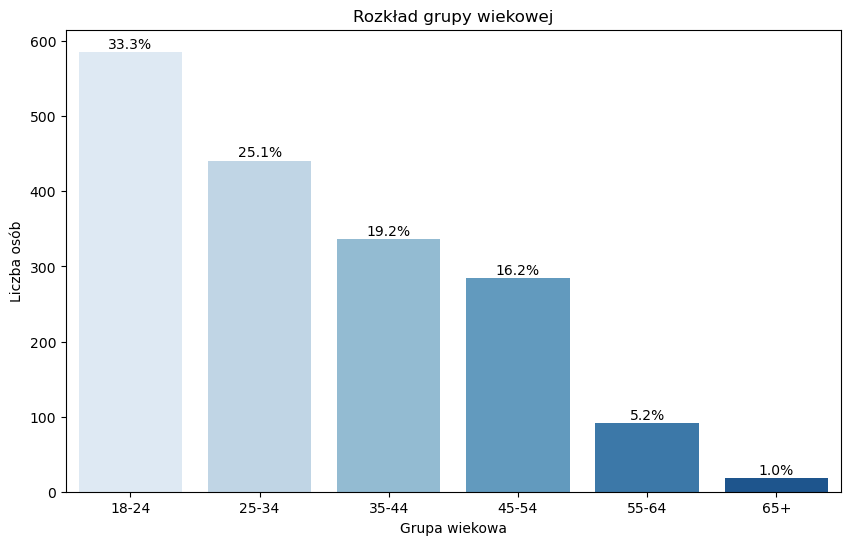

In [26]:
plot_bar_chart(df, 'Age', 'Rozkład grupy wiekowej', 'Grupa wiekowa', 'Liczba osób')

- Gender

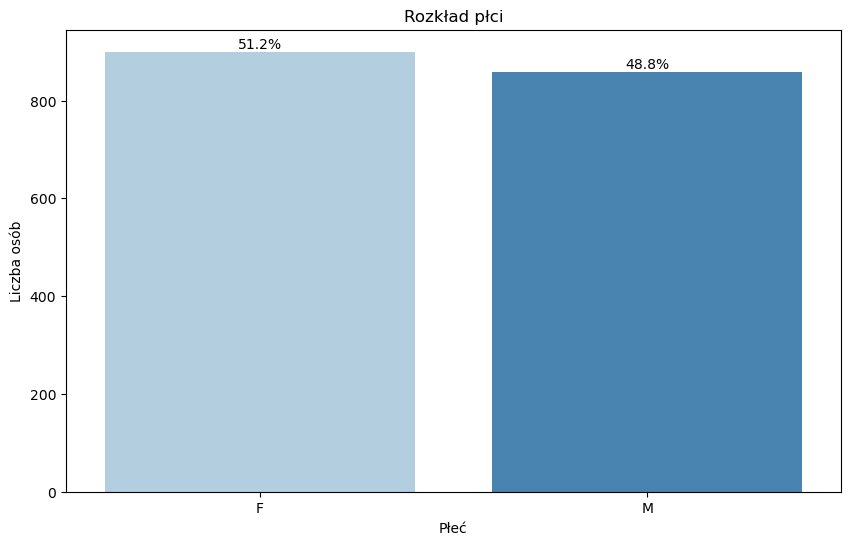

In [27]:
plot_bar_chart(df, 'Gender', 'Rozkład płci', 'Płeć', 'Liczba osób')

- Education

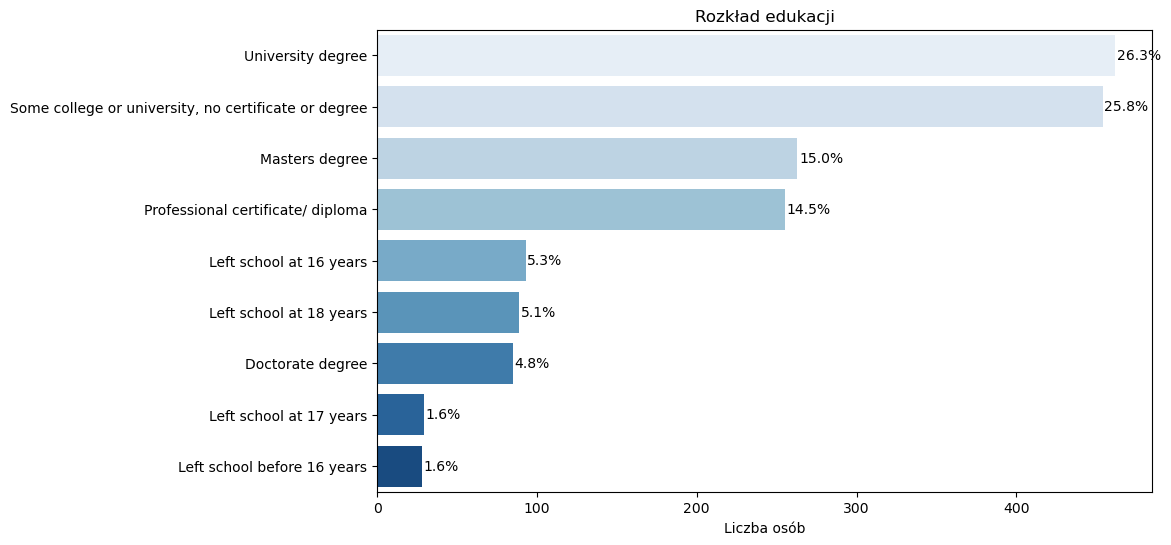

In [28]:
plot_horizontal_bar_chart(df, 'Education', 'Rozkład edukacji')

- Country

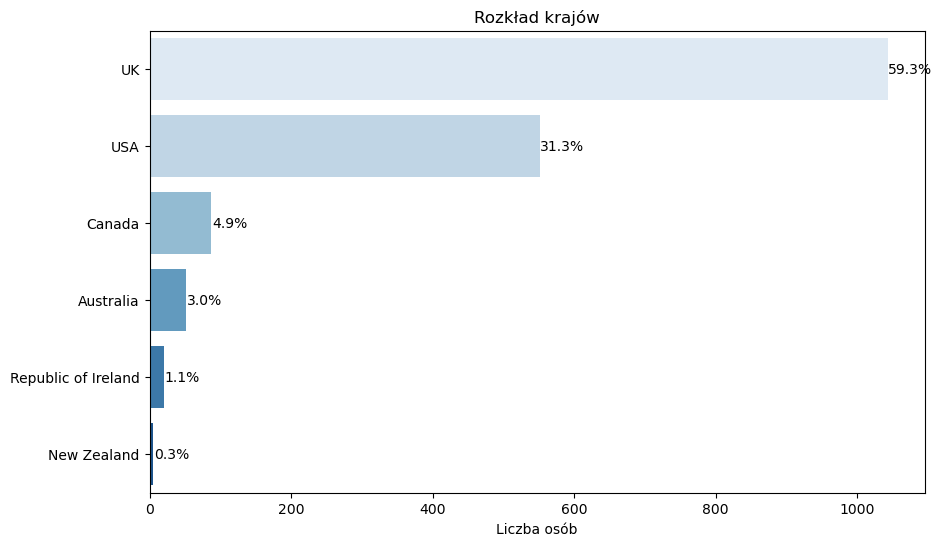

In [29]:
plot_horizontal_bar_chart(df, 'Country', 'Rozkład krajów')

- Ethnicity

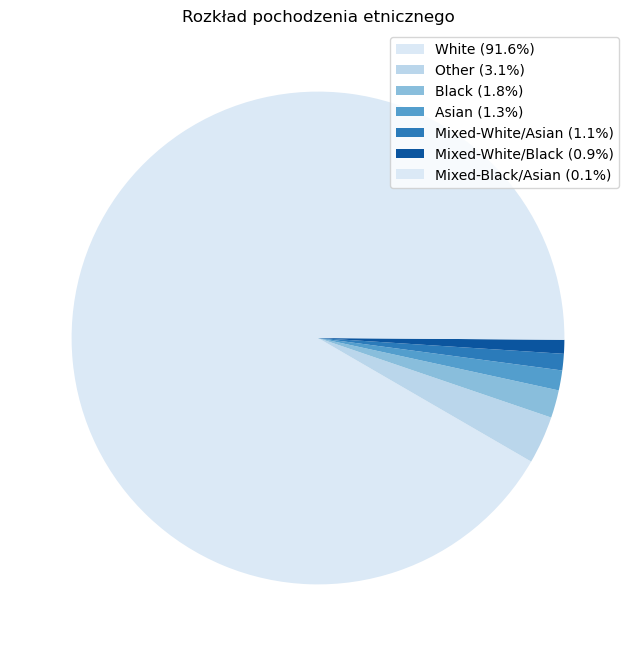

In [30]:
plot_pie_distribution(df, 'Ethnicity', 'Rozkład pochodzenia etnicznego')

It does not give us much information, as the data is very general.

In [31]:
ethnicity_counts = df['Ethnicity'].value_counts()
ethnicity_percentage = (ethnicity_counts / len(df)) * 100
ethnicity_percentage_rounded = ethnicity_percentage.round(2)

ethnicity_data = pd.DataFrame({'Count': ethnicity_counts, 'Percentage': ethnicity_percentage_rounded})

ethnicity_data

,Count,Percentage
Ethnicity,,
White,1611,91.64
Other,55,3.13
Black,32,1.82
Asian,23,1.31
Mixed-White/Asian,19,1.08
Mixed-White/Black,16,0.91
Mixed-Black/Asian,2,0.11


### Plotting personality attributes
- Nscore
- Escore
- Oscore
- Ascore
- Cscore
- Impulsive
- SS

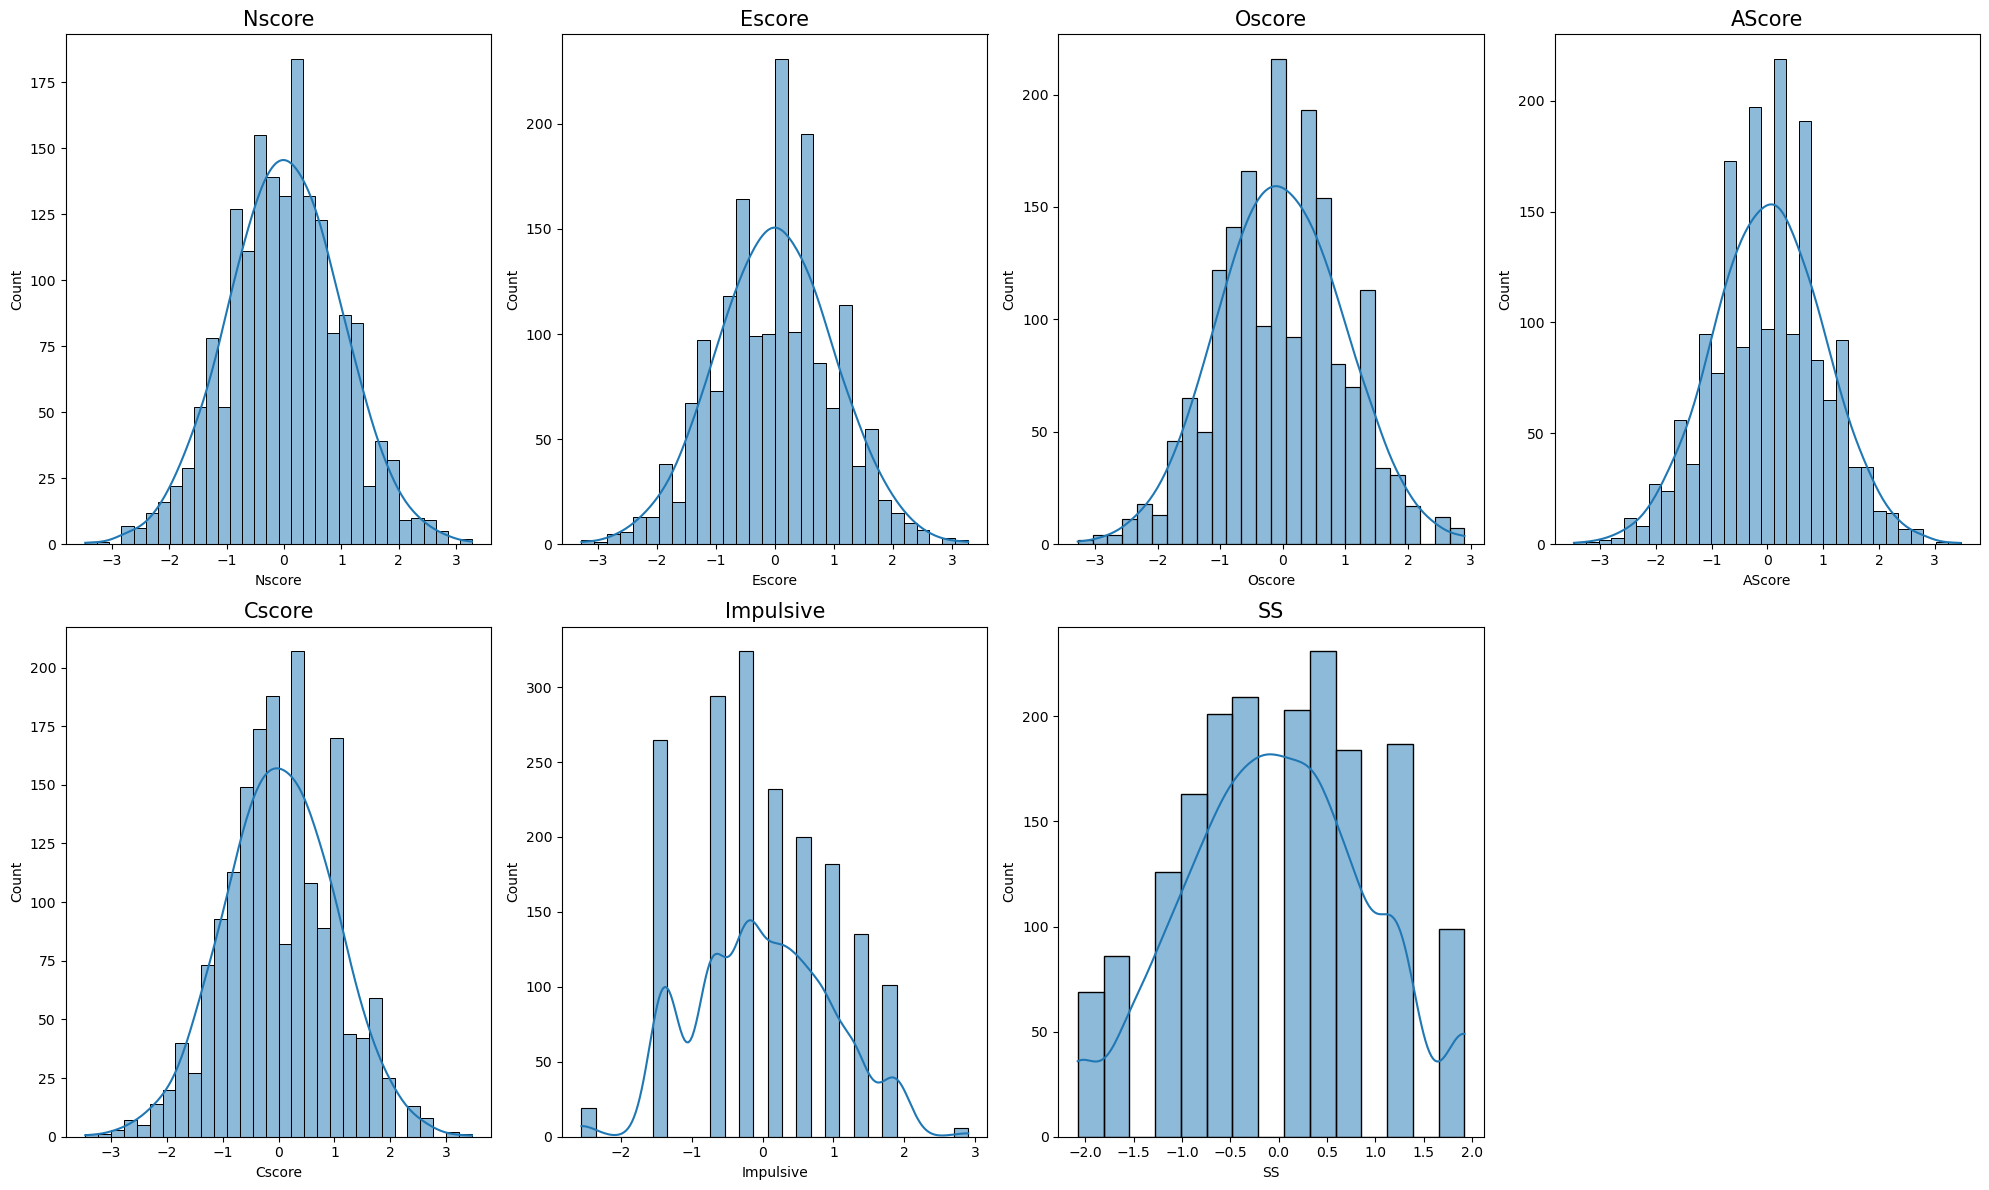

In [32]:
personality_cols = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']

warnings.filterwarnings("ignore", category=FutureWarning) 

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
for i, trait in enumerate(personality_cols):
    row = i // 4  # row num
    col = i % 4   # col num
    sns.histplot(df[trait], ax=axes[row, col], kde=True)
    axes[row, col].set_title(trait, fontsize=15)

for ax in axes.flat:
    if not ax.has_data():
        fig.delaxes(ax)
        
plt.tight_layout()
plt.show()


### Conversion of drug consumption columns
- CLO -> 0 - Never used
- CL1 -> 1 - Used over a decade ago
- CL2 -> 2 - Used in the last decade
- CL3 -> 3 - Used in the last year
- CL4 -> 4 - Used in the last month
- CL5 -> 5 - Used in the last week
- CL6 -> 6 - Used in the last day


In [33]:
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']

drug_values = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
}

df[drug_cols] = df[drug_cols].replace(drug_values)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Mental health level
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,2
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,3
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,1
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,3
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,3,3,0,0,0,5,4
1754,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,2,0,0,3,5,4,4,5,0,4
1755,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,4,0,2,0,2,0,2,6,0,3
1756,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,3,0,0,3,3,0,3,4,0,4


### Groupes of drugs
We have 3 categories of drugs (categorized by their structure):
1. Opioid group (opioid_drugs) which includes: crack, cocaine, methadone, and heroin
2. Ecstasy group (ecstasy_drugs) which includes: amphetamines, cannabis, cocaine, ketamine, LSD, magic mushrooms, legal highs, and ecstasy.
3. Benzodiazepines group (benzo_drugs) which includes methadone, amphetamines, and cocaine.

In [34]:
df['opioid_drugs'] = df[['Coke', 'Crack', 'Heroin', 'Meth']].max(axis=1)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Mental health level,opioid_drugs
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,2,0,2,3,0,4,0,2,3
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,1,0,0,3,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,2,0,0,0,0,2,0,1,2
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,1,0,0,2,2,0,3,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,3,3,0,0,0,5,4,0
1754,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,0,0,3,5,4,4,5,0,4,4
1755,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,0,2,0,2,0,2,6,0,3,4
1756,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,0,0,3,3,0,3,4,0,4,0


In [35]:
df['ecstasy_drugs'] = df[['Amphet', 'Cannabis', 'Coke', 'Ketamine', 'LSD', 'Mushrooms', 'Legalh', 'Ecstasy']].max(axis=1)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Mental health level,opioid_drugs,ecstasy_drugs
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,2,0,2,3,0,4,0,2,3,4
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,1,0,0,3,0,3
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,2,0,0,0,0,2,0,1,2,2
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,2,2,0,3,0,3
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,6,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,3,3,0,0,0,5,4,0,5
1754,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,0,3,5,4,4,5,0,4,4,5
1755,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,2,0,2,0,2,6,0,3,4,6
1756,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,0,3,3,0,3,4,0,4,0,6


In [36]:
df['benzo_drugs'] = df[['Amphet', 'Coke', 'Meth']].max(axis=1)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,2,3,0,4,0,2,3,4,3
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,1,0,0,3,0,3,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,2,0,1,2,2,2
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,2,2,0,3,0,3,1
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,3,3,0,0,0,5,4,0,5,0
1754,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,3,5,4,4,5,0,4,4,5,4
1755,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,0,2,0,2,6,0,3,4,6,6
1756,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,3,3,0,3,4,0,4,0,6,0


We can drop the columns that are not needed anymore.

In [37]:
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']
df = df.drop(drug_cols, axis=1)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0
1754,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4
1755,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6
1756,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0


In [38]:
df_plots = df

### Code demographic features into numerical values

1. Age

In [39]:
age_col = {
          '18-24': 0,
          '25-34': 1,
          '35-44': 2,
          '45-54': 3,
          '55-64': 4,
          '65+': 5
          }
df['Age'] = df['Age'].replace(age_col)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs
0,1,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3
1,2,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0
2,0,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2
3,2,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1
4,5,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0
1754,0,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4
1755,1,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6
1756,0,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0


2. Gender

In [40]:
gender_col = {
            'F': 0,
            'M': 1
            }
df['Gender'] = df['Gender'].replace(gender_col)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs
0,1,1,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3
1,2,1,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0
2,0,0,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2
3,2,0,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1
4,5,0,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0
1754,0,1,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4
1755,1,0,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6
1756,0,0,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0


3. Education

In [41]:
education_col = {
            'Left school before 16 years': 0,
            'Left school at 16 years': 1,
            'Left school at 17 years': 2,
            'Left school at 18 years': 3,
            'Some college or university, no certificate or degree': 4,
            'Professional certificate/ diploma': 5,
            'University degree': 6,
            'Masters degree': 7,
            'Doctorate degree': 8
            }
df['Education'] = df['Education'].replace(education_col)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs
0,1,1,8,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3
1,2,1,5,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0
2,0,0,7,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2
3,2,0,8,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1
4,5,0,3,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0
1754,0,1,4,USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4
1755,1,0,6,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6
1756,0,0,4,USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0


4. Country

In [42]:
country_col = {
            'Australia': 0,
            'Canada': 1,
            'New Zealand': 2,
            'Other': 3,
            'Republic of Ireland': 4,
            'UK': 5,
            'USA': 6
            }
df['Country'] = df['Country'].replace(country_col)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs
0,1,1,8,5,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3
1,2,1,5,5,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0
2,0,0,7,5,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2
3,2,0,8,5,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1
4,5,0,3,1,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,6,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0
1754,0,1,4,6,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4
1755,1,0,6,6,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6
1756,0,0,4,6,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0


5. Ethnicity

In [43]:
ethnicity_col = {
            'Asian': 0,
            'Black': 1,
            'Mixed-Black/Asian': 2,
            'Mixed-White/Asian': 3,
            'Mixed-White/Black': 4,
            'Other': 5,
            'White': 6
            }
df['Ethnicity'] = df['Ethnicity'].replace(ethnicity_col)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0
1754,0,1,4,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4
1755,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6
1756,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0


### Exploring drug groups  

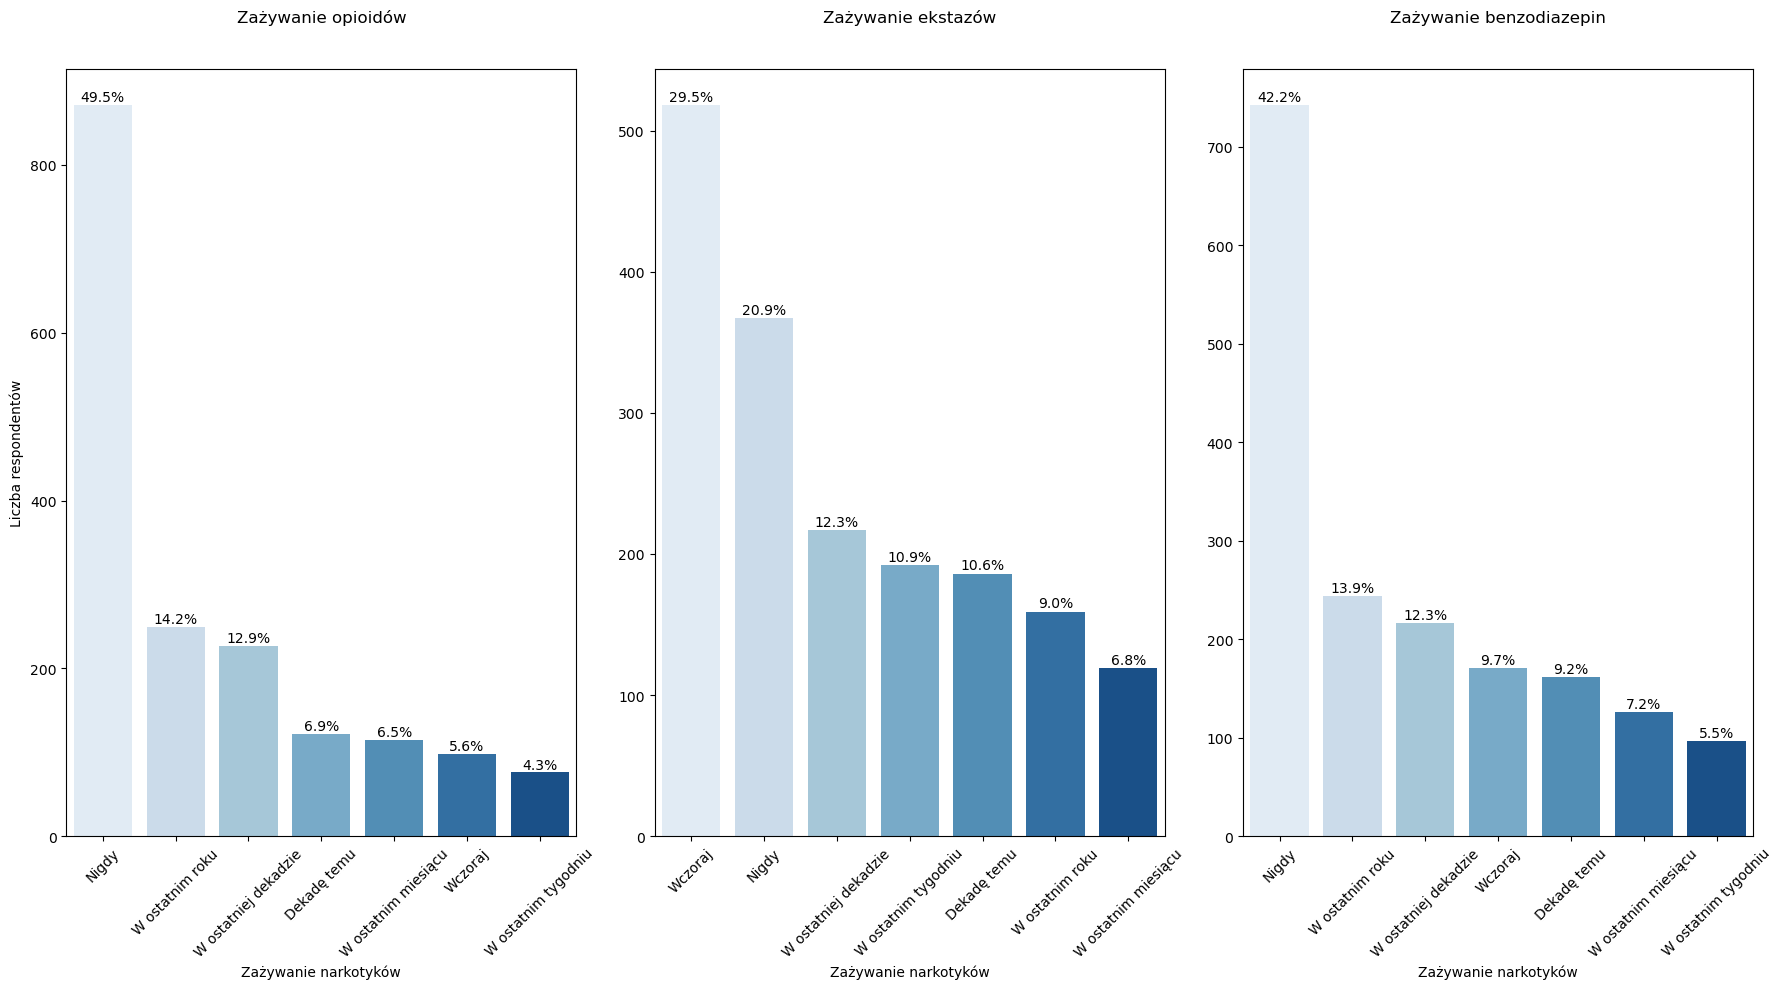

In [44]:
def plot_bar_chart_drug(data, columns, titles, x_label_map, x_label_name, y_label_name):
    plt.figure(figsize=(18, 10))
    
    for i, column in enumerate(columns):
        plt.subplot(1, 3, i+1)
        sorted_data = data[column].value_counts().sort_values(ascending=False)
        ax = sns.countplot(data=data, x=column, order=sorted_data.index, palette='Blues')
        
        total_count = data.shape[0]
        for index, value in enumerate(sorted_data):
            percentage = '{:0.1f}%'.format(100 * value / total_count)
            plt.text(index, value + 1, str(percentage), ha='center', va='bottom')
        
        plt.title(titles[i], y=1.05)
        plt.xlabel(x_label_name)
        
        if i == 0:
            plt.ylabel(y_label_name)
        else:
            plt.ylabel('')
        
    
        new_labels = [x_label_map.get(item, item) for item in sorted_data.index]
        ax.set_xticklabels(new_labels, rotation=45)  
    
    plt.tight_layout()
    plt.show()

columns = ['opioid_drugs', 'ecstasy_drugs', 'benzo_drugs']
titles = ['Zażywanie opioidów', 'Zażywanie ekstazów', 'Zażywanie benzodiazepin']
x_label_name = 'Zażywanie narkotyków'
y_label_name = 'Liczba respondentów'

x_label_map = {
    0: 'Nigdy',
    1: 'Dekadę temu',
    2: 'W ostatniej dekadzie',
    3: 'W ostatnim roku',
    4: 'W ostatnim miesiącu',
    5: 'W ostatnim tygodniu',
    6: 'Wczoraj'
}


plot_bar_chart_drug(df, columns, titles, x_label_map, x_label_name, y_label_name)


### We can classify the data into 2 groups: user and non-user
- 0 - non-user
- 1 - non-user
- 2 - user
- 3 - user
- 4 - user
- 5 - user
- 6 - user
And create column that represents rather person is user or non-user.

In [45]:
df['user'] = df[['opioid_drugs', 'ecstasy_drugs', 'benzo_drugs']].max(axis=1)
df['user'] = df['user'].apply(lambda x: 0 if (x == 0 or x == 1) else 1)

In [46]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs,user
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3,1
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0,1
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2,1
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1,1
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0,1
1754,0,1,4,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4,1
1755,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6,1
1756,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0,1


### Plotting the number of people who use and do not use drugs

Text(0.5, 0, '')

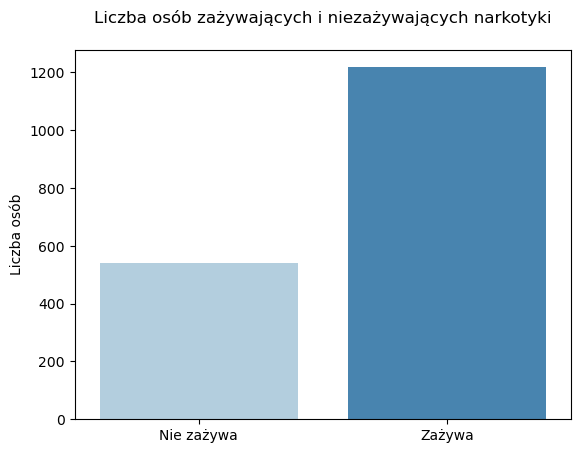

In [47]:
users_labels = {
    0: 'Nie zażywa',
    1: 'Zażywa'
}
plt.plot(figure=(10, 6))
sns.countplot(data=df, x='user', palette='Blues')
plt.xticks(ticks=list(users_labels.keys()), labels=list(users_labels.values()))
plt.title('Liczba osób zażywających i niezażywających narkotyki', y=1.05)
plt.ylabel('Liczba osób')
plt.xlabel('')

### Correlations

In [48]:
df


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs,user
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3,1
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0,1
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2,1
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1,1
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0,1
1754,0,1,4,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4,1
1755,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6,1
1756,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0,1


1. Opioid group

<Axes: >

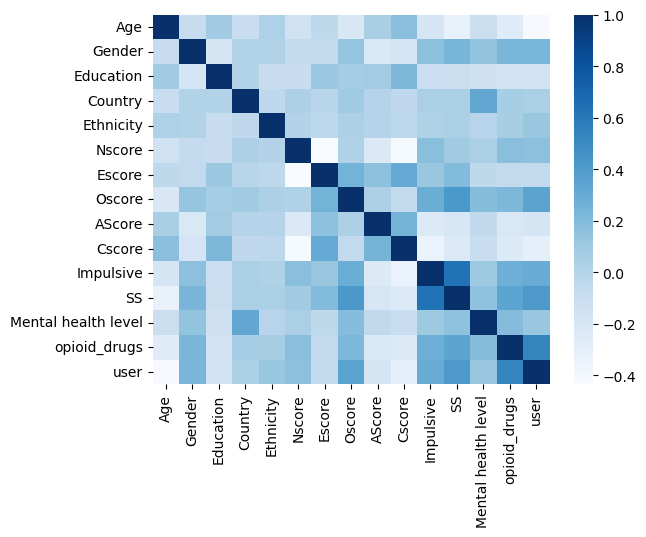

In [49]:
df_opioid = df.drop(['ecstasy_drugs', 'benzo_drugs'], axis=1)
corr_opioid = df_opioid.corr()
sns.heatmap(corr_opioid, cmap='Blues')

2. Ecstasy pleiad

<Axes: >

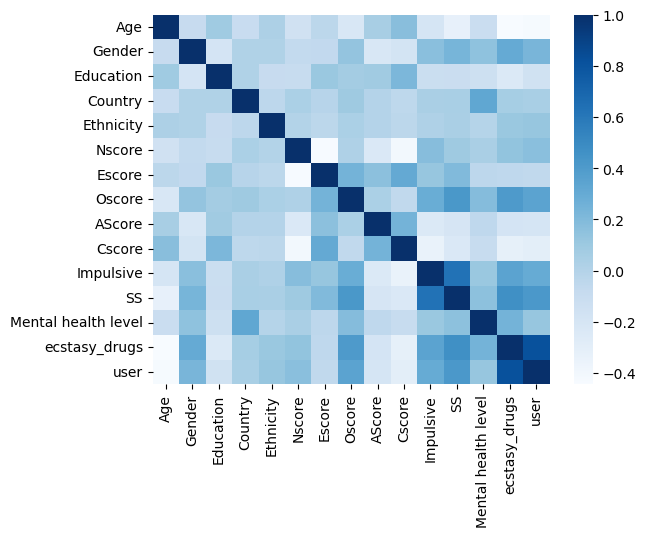

In [50]:
df_ecstasy = df.drop(['opioid_drugs', 'benzo_drugs'], axis=1)
corr_ecstasy = df_ecstasy.corr()
sns.heatmap(corr_ecstasy, cmap='Blues')

3. Benzodiazepines pleiad

<Axes: >

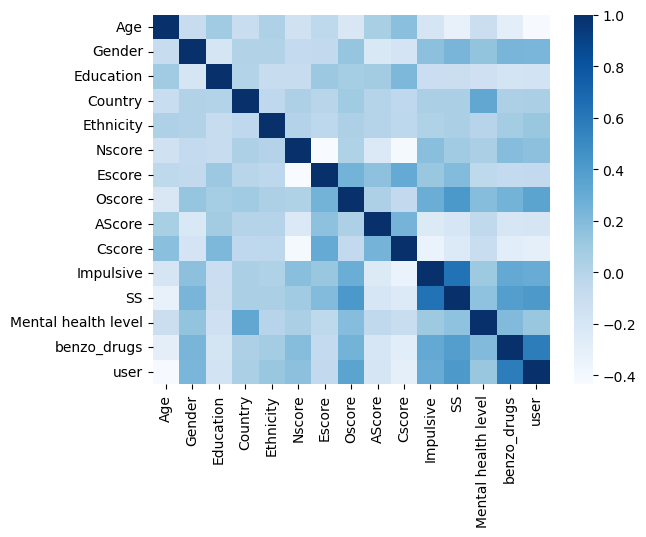

In [51]:
df_benzo = df.drop(['opioid_drugs', 'ecstasy_drugs'], axis=1)
corr_benzo = df_benzo.corr()
sns.heatmap(corr_benzo, cmap='Blues')

Most of the correlations are weak, but we can see some stronger ones mostly between mental health and drug consumption.

### Most correlated features

Creating correlation tables

In [52]:
corr_opioid_table = corr_opioid.corrwith(corr_opioid['opioid_drugs'])
corr_opioid_dict = dict(corr_opioid_table)
del corr_opioid_dict['opioid_drugs']

corr_ecstasy_table = corr_ecstasy.corrwith(corr_ecstasy['ecstasy_drugs'])
corr_ecstasy_dict = dict(corr_ecstasy_table)
del corr_ecstasy_dict['ecstasy_drugs']

corr_benzo_table = corr_benzo.corrwith(corr_benzo['benzo_drugs'])
corr_benzo_dict = dict(corr_benzo_table)
del corr_benzo_dict['benzo_drugs']

Sort data

In [53]:
corr_opioid_dict = dict(sorted(corr_opioid_dict.items(), key=lambda x: x[1]))
corr_ecstasy_dict = dict(sorted(corr_ecstasy_dict.items(), key=lambda x: x[1]))
corr_benzo_dict = dict(sorted(corr_benzo_dict.items(), key=lambda x: x[1]))

### Plotting correlation tables

1. Heroin pleiad
2. Ecstasy pleiad
3. Benzodiazepines pleiad

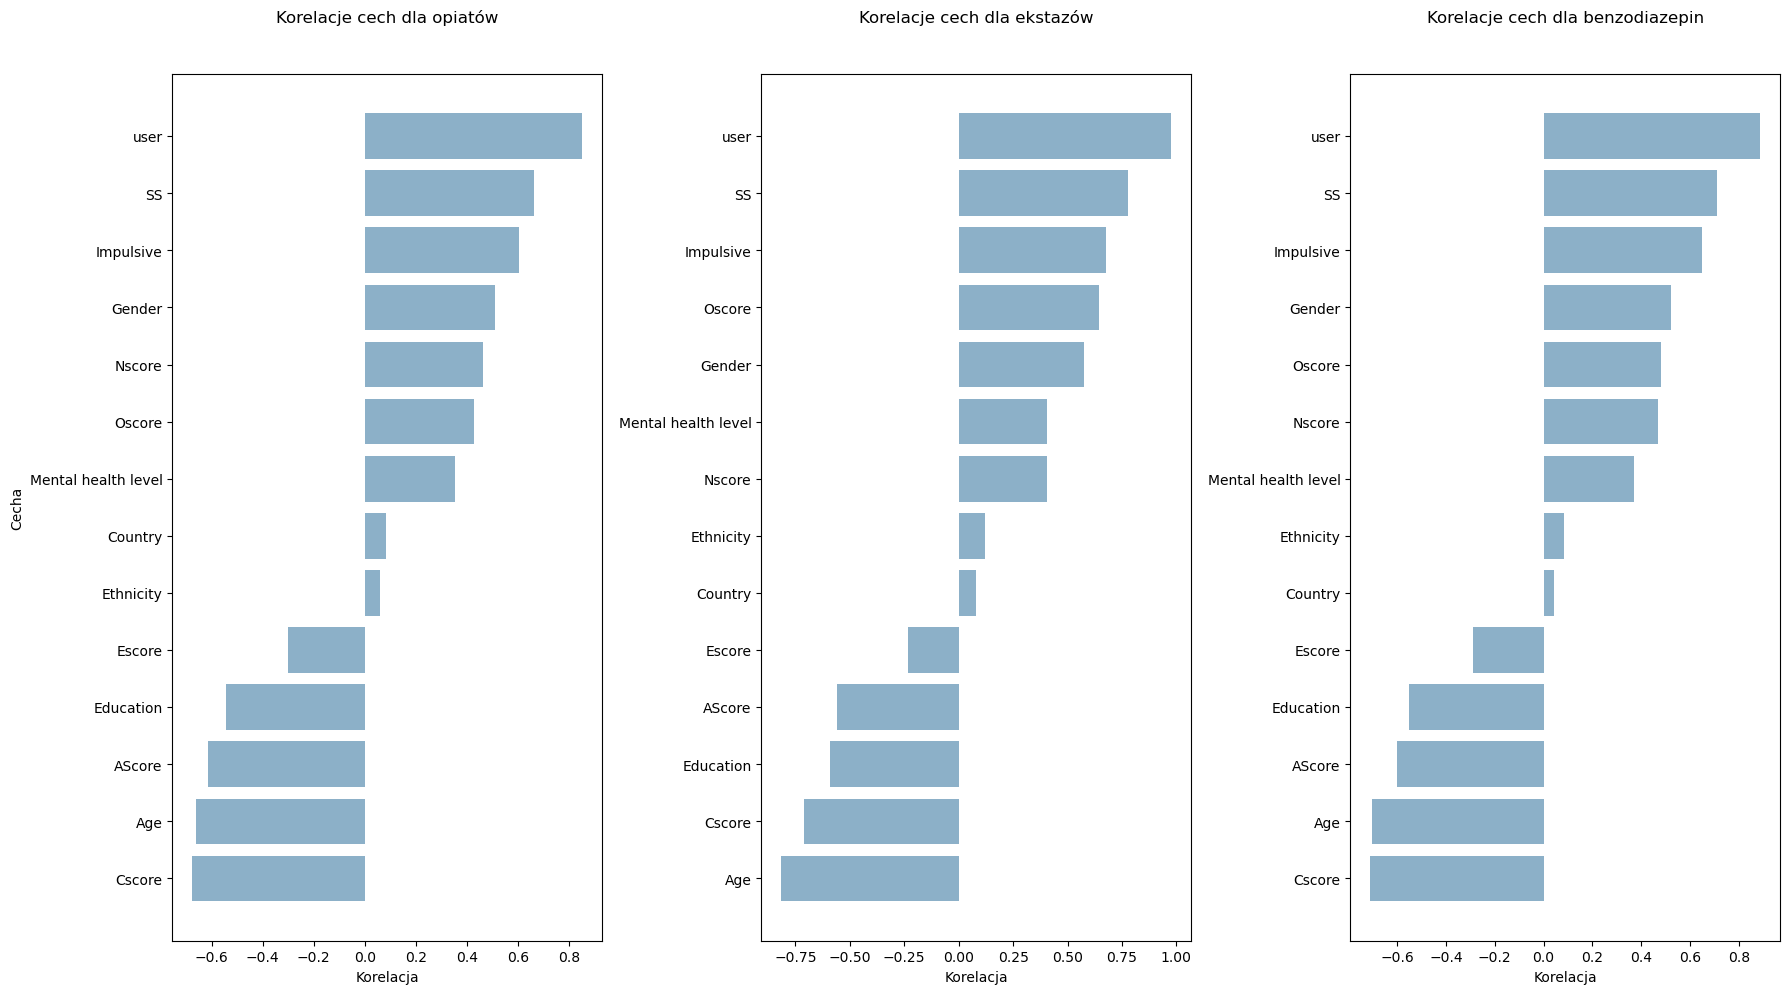

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(18, 10))
# Wykresy dla różnych grup
for i, corr_heroin_dict in enumerate([corr_opioid_dict, corr_ecstasy_dict, corr_benzo_dict]):
    axs[i].barh(list(corr_heroin_dict.keys()), list(corr_heroin_dict.values()), color='#8CB0C8')
    axs[i].set_xlabel('Korelacja')
    axs[0].set_ylabel('Cecha')
    axs[0].set_title(f'Korelacje cech dla opiatów', y=1.05)
    axs[1].set_title(f'Korelacje cech dla ekstazów', y=1.05)
    axs[2].set_title(f'Korelacje cech dla benzodiazepin', y=1.05)

plt.tight_layout()  # Zapewnia odpowiednie odstępy między wykresami
plt.show()

Conclusion: The most correlated features are mental health issues, which is expected. Country and Ethniciy are very little correlated with drug consumption, as the information about them is very general.

### Sensation seeking vs Age
Sensation seeking is higher for people in young age (18-30).

<Figure size 1000x800 with 0 Axes>

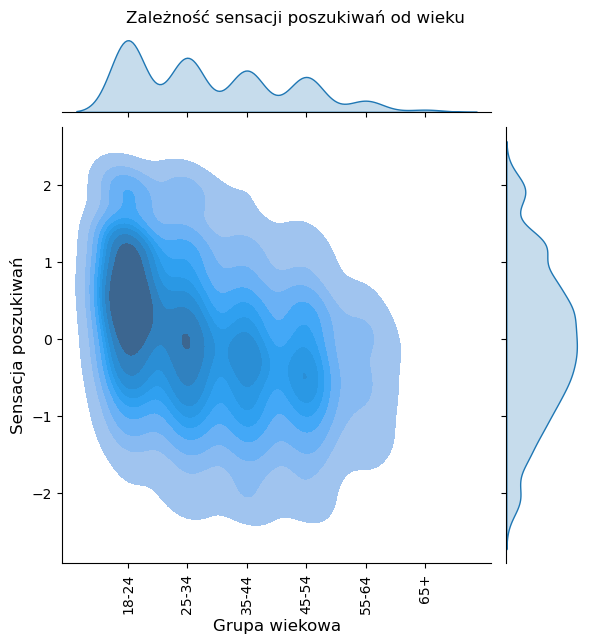

In [55]:
age_groups = {0: '18-24', 1: '25-34', 2: '35-44', 3: '45-54', 4: '55-64', 5: '65+'}

plt.figure(figsize=(10, 8))
joint = sns.jointplot(x="Age", y="SS", data=df, kind="kde", fill=True, palette="Blues")

joint.set_axis_labels('Grupa wiekowa', 'Sensacja poszukiwań', fontsize=12)
joint.fig.suptitle('Zależność sensacji poszukiwań od wieku', y=1.02)

plt.xticks(ticks=list(age_groups.keys()), labels=list(age_groups.values()), rotation=90)

plt.show()

### Sensation seeking vs drug use

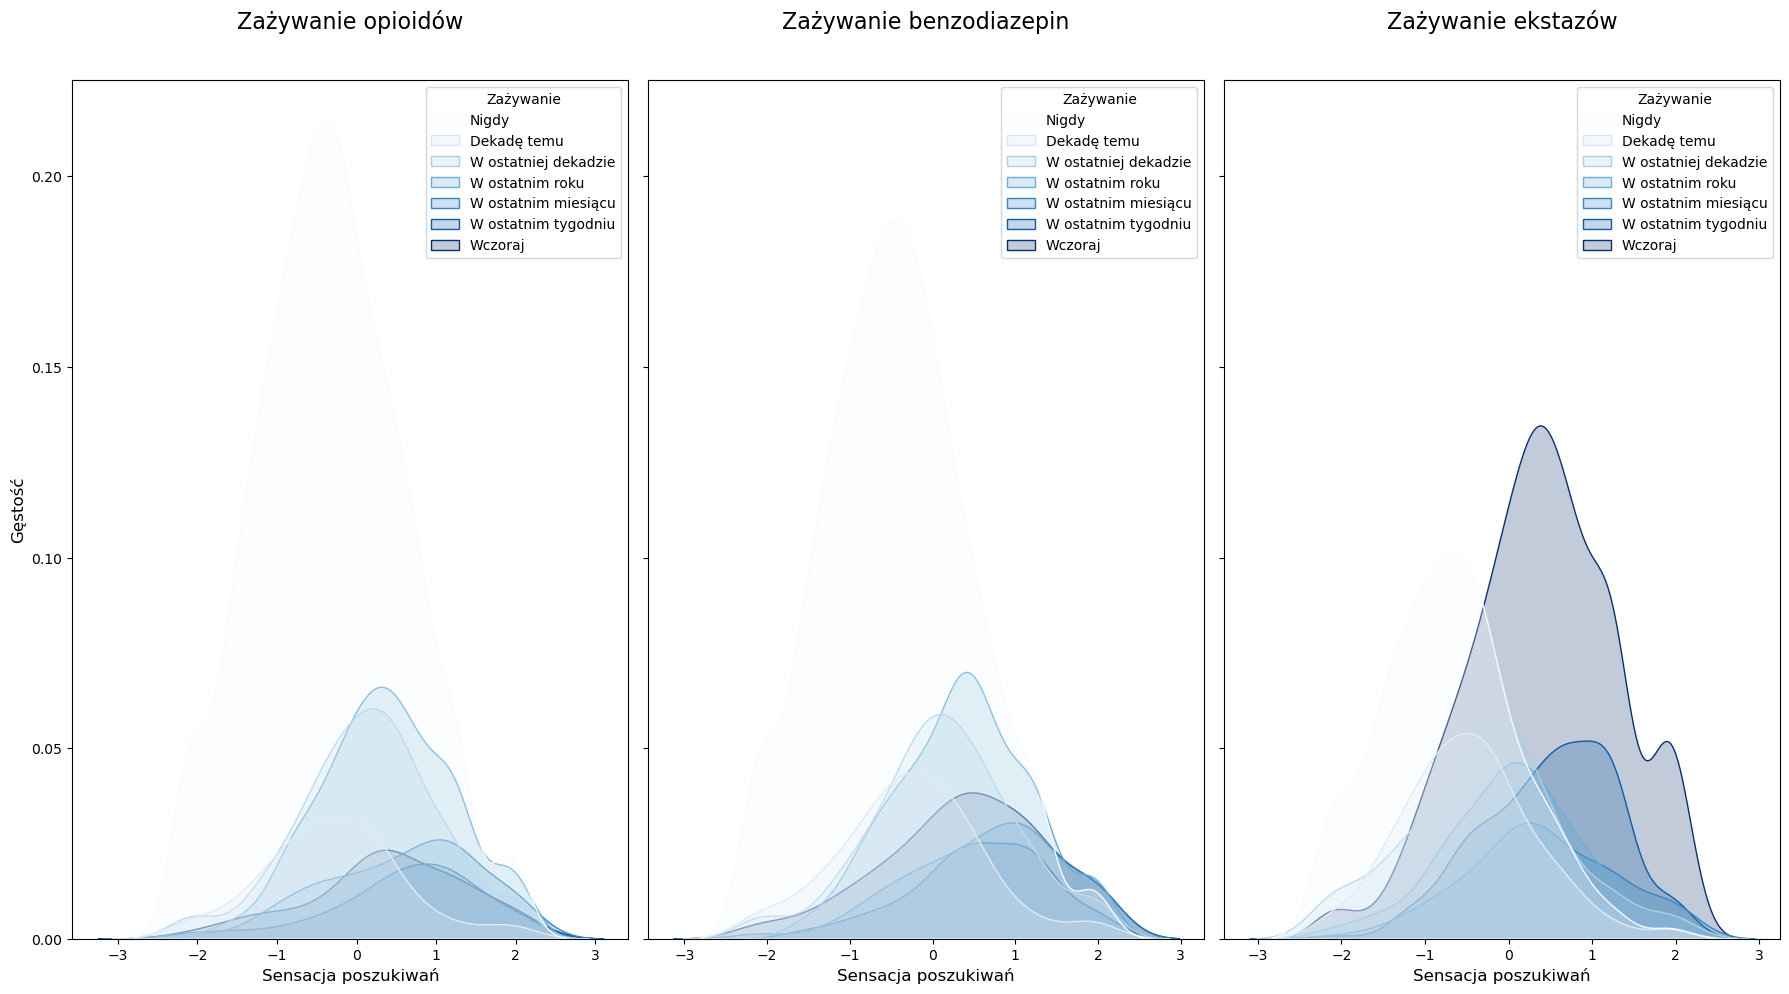

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)

drug_vars = ['opioid_drugs', 'benzo_drugs', 'ecstasy_drugs']
titles = ['Zażywanie opioidów', 'Zażywanie benzodiazepin', 'Zażywanie ekstazów']

legend_labels = {0: 'Nigdy', 1: 'Dekadę temu', 2: 'W ostatniej dekadzie', 3: 'W ostatnim roku',
                 4: 'W ostatnim miesiącu', 5: 'W ostatnim tygodniu', 6: 'Wczoraj'}

for i, drug in enumerate(drug_vars):
    sns.kdeplot(x='SS', hue=drug, data=df, shade=True, palette='Blues', ax=axs[i])
    axs[i].set_title(titles[i], size=16, y=1.05)
    axs[i].set_xlabel('Sensacja poszukiwań', size=12)
    if i == 0:
        axs[i].set_ylabel('Gęstość', size=12)
    else:
        axs[i].set_ylabel('')

    legend = axs[i].get_legend()
    legend.set_title('Zażywanie')
    for text, label in zip(legend.texts, legend_labels.values()):
        text.set_text(label)

plt.tight_layout()

plt.show()


Conclusion: Sensation seeking is higher for people in young age (18-30), which confirms the hypothesis.

### Mental health

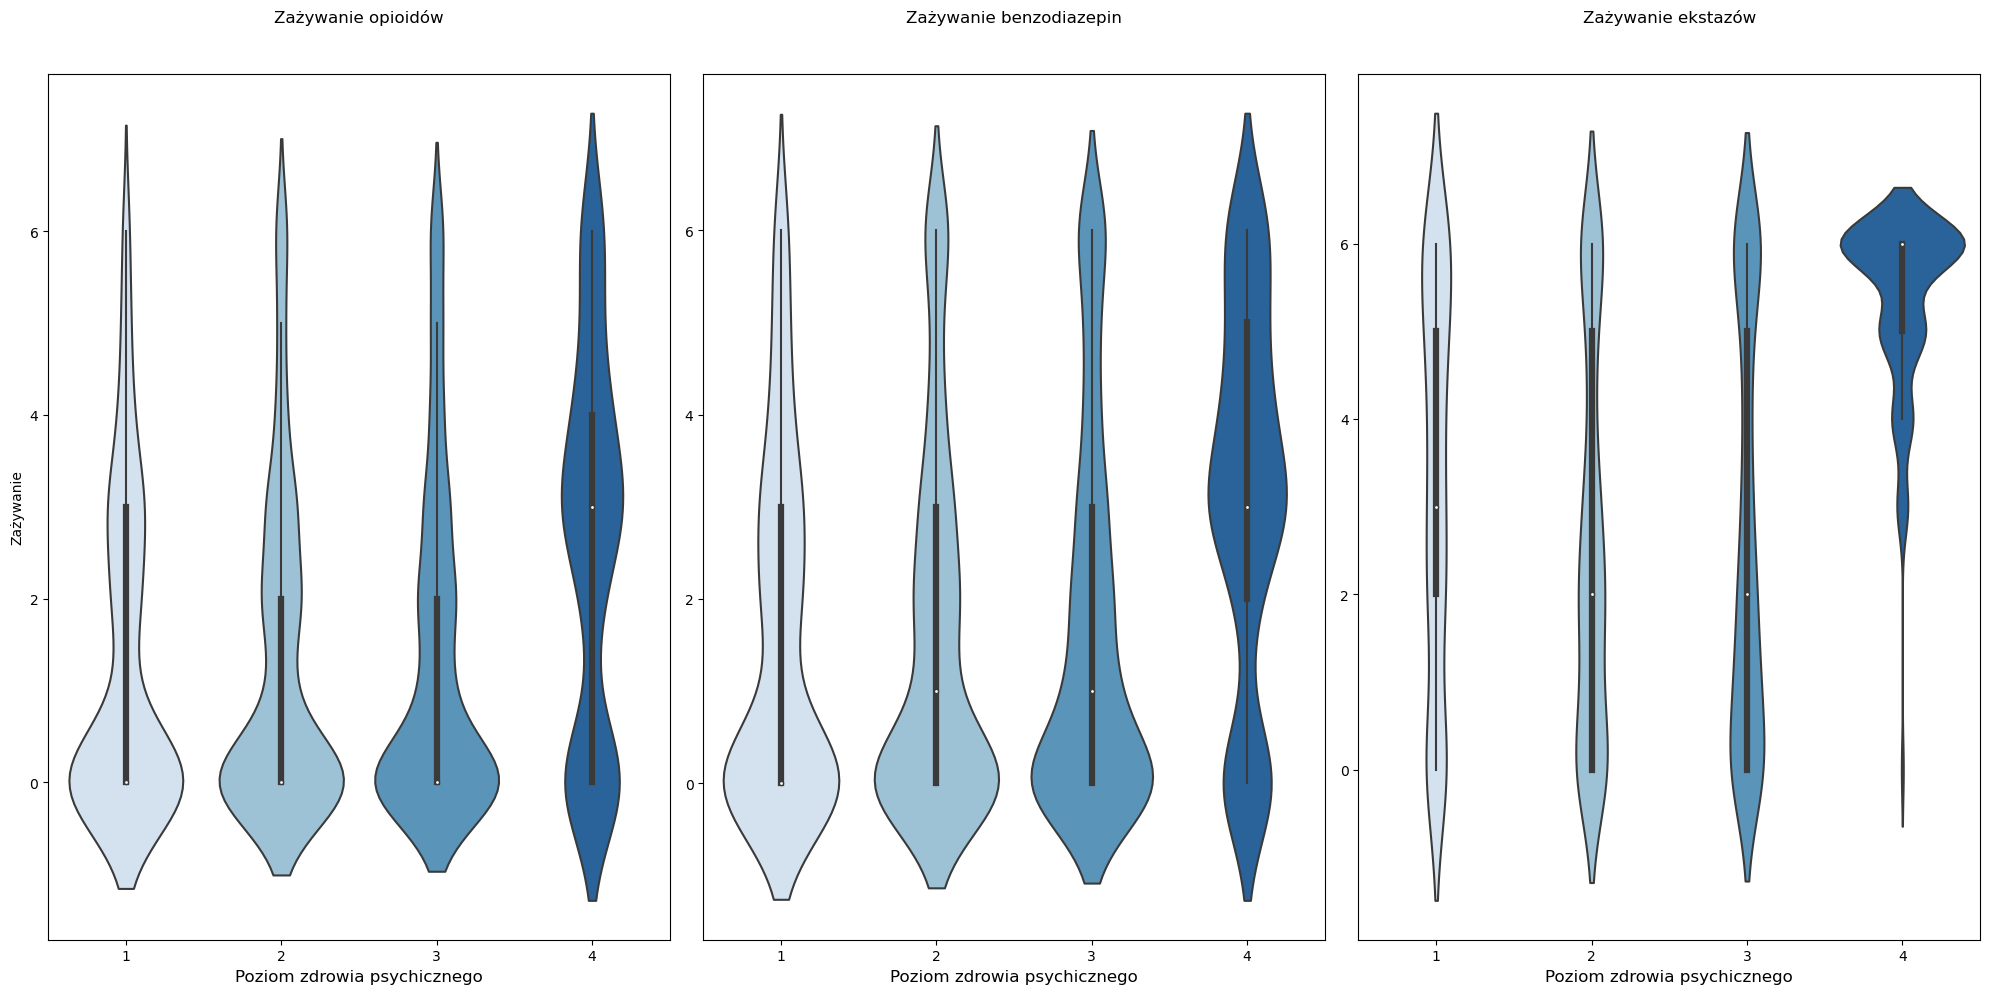

In [57]:
f = plt.figure(figsize=(20, 10))
gs = f.add_gridspec(1, 3)

# first chart
sns.ax = f.add_subplot(gs[0, 0])
sns.violinplot(data=df, x='Mental health level', y='opioid_drugs', palette='Blues')
plt.title('Zażywanie opioidów', fontsize=12, y=1.05)
plt.ylabel('Zażywanie')


# secon chart
sns.ax = f.add_subplot(gs[0, 1])
sns.violinplot(data=df, x='Mental health level', y='benzo_drugs', palette='Blues')
plt.title('Zażywanie benzodiazepin', fontsize=12, y=1.05)
plt.ylabel('')

# third chart
sns.ax = f.add_subplot(gs[0, 2])
sns.violinplot(data=df, x='Mental health level', y='ecstasy_drugs', palette='Blues')
plt.title('Zażywanie ekstazów', fontsize=12, y=1.05)
plt.ylabel('')



# labels
for ax in f.axes:
    ax.set_xlabel('Poziom zdrowia psychicznego', fontsize=12)
    
plt.tight_layout()
plt.show()


Most of the drug consumption is in the age group 18-30. Drugs are more often consumpted by men.

### Age vs Drugs

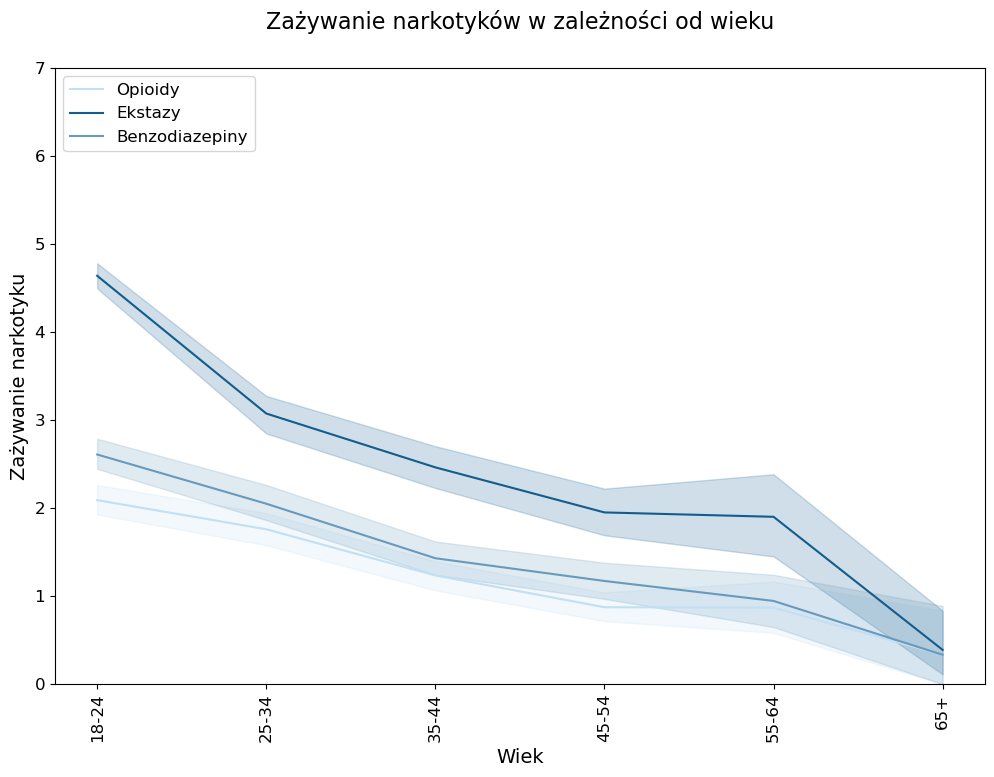

opioid_drugs
0    871
3    249
2    227
1    122
4    115
6     98
5     76
Name: count, dtype: int64


In [58]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Age', y='opioid_drugs', label='Opioidy', color='#C2DFF3')
sns.lineplot(data=df, x='Age', y='ecstasy_drugs', label='Ekstazy', color='#135C8C')
sns.lineplot(data=df, x='Age', y='benzo_drugs', label='Benzodiazepiny', color='#679ABC')
plt.legend(loc='upper left', fontsize=12)
plt.title('Zażywanie narkotyków w zależności od wieku', fontsize=16, y=1.05)
plt.xlabel('Wiek', fontsize=14)
plt.ylabel('Zażywanie narkotyku', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 7)

plt.xticks(ticks=list(age_groups.keys()), labels=list(age_groups.values()), rotation=90)

plt.show()

print(df['opioid_drugs'].value_counts())

### Categorizing drugs into used and not used
- 0 - non-user
- 1 - non-user
- 2 - user
- 3 - user
- 4 - user
- 5 - user
- 6 - user

In [59]:
df['opioid_use'] = df['opioid_drugs'].apply(lambda x: 'non-user' if (x == 0 or x == 1) else 'user')
df['ecstasy_use'] = df['ecstasy_drugs'].apply(lambda x: 'non-user' if (x == 0 or x == 1) else 'user')
df['benzo_use'] = df['benzo_drugs'].apply(lambda x: 'non-user' if (x == 0 or x == 1) else 'user')

df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs,user,opioid_use,ecstasy_use,benzo_use
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3,1,user,user,user
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0,1,non-user,user,non-user
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2,1,user,user,user
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1,1,non-user,user,non-user
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0,0,non-user,non-user,non-user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0,1,non-user,user,non-user
1754,0,1,4,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4,1,user,user,user
1755,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6,1,user,user,user
1756,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0,1,non-user,user,non-user


### Drugs users with gender

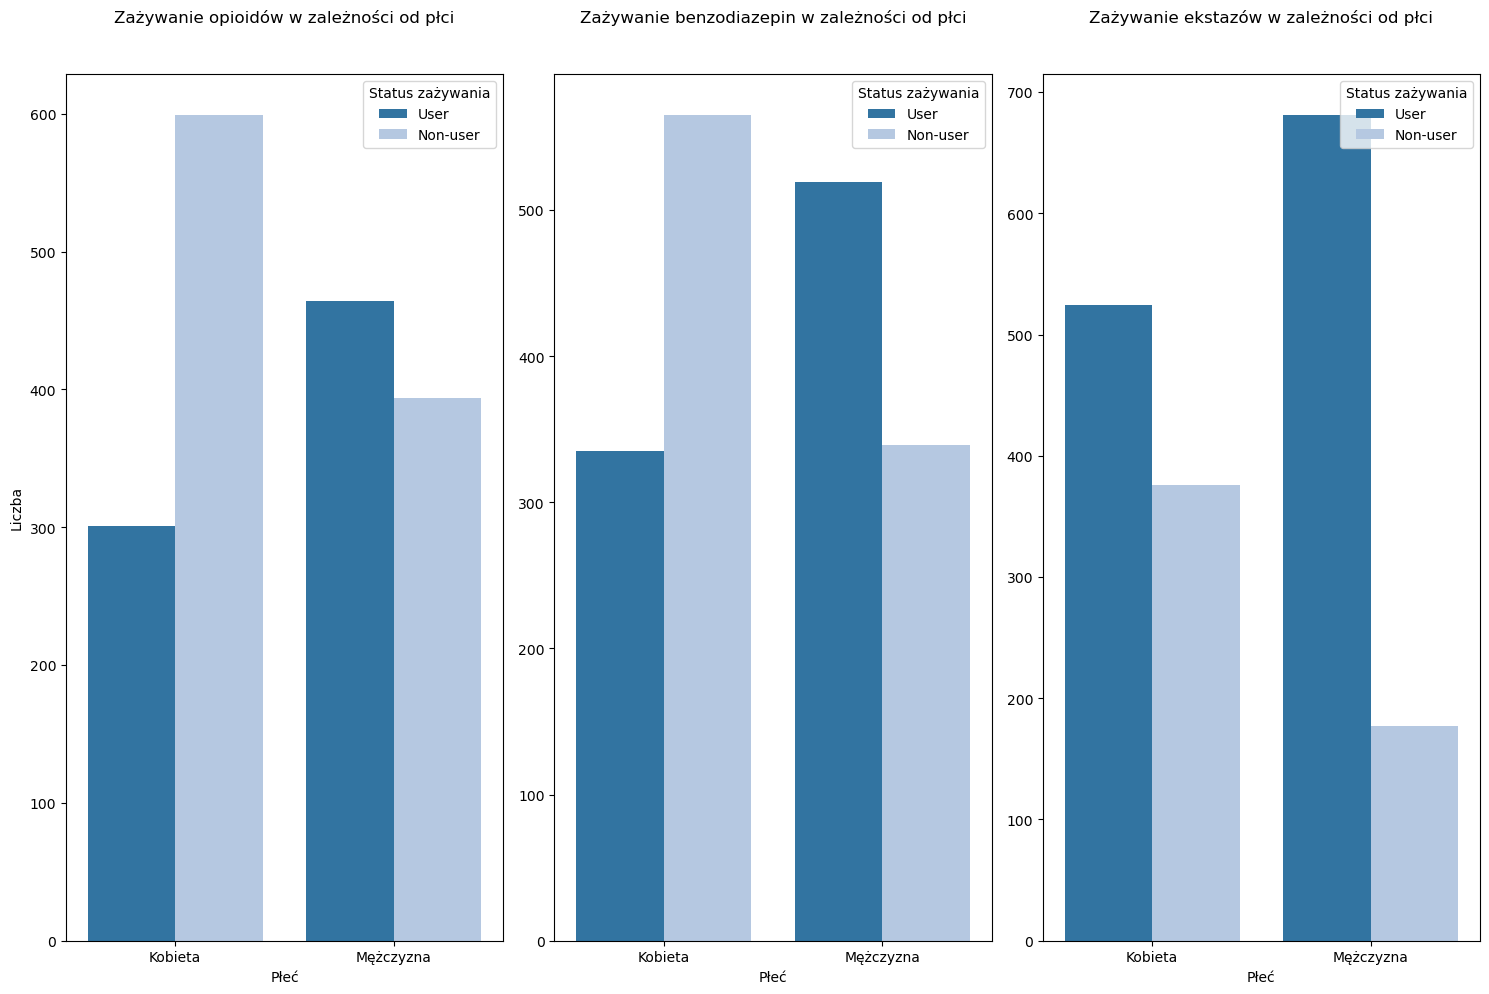

In [60]:
genders = {
    0: 'Kobieta',
    1: 'Mężczyzna'
}

order = ['user', 'non-user']
palette = ['#1f77b4', '#aec7e8']

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Gender', hue='opioid_use', palette=palette, hue_order=order)
plt.title('Zażywanie opioidów w zależności od płci', y=1.05)
plt.xlabel('Płeć')
plt.ylabel('Liczba')
plt.legend(title='Status zażywania', loc='upper right', labels=['User', 'Non-user'])
plt.xticks(ticks=list(genders.keys()), labels=list(genders.values()))

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Gender', hue='benzo_use', palette=palette, hue_order=order)
plt.title('Zażywanie benzodiazepin w zależności od płci', y=1.05)
plt.xlabel('Płeć')
plt.ylabel('')
plt.legend(title='Status zażywania', loc='upper right', labels=['User', 'Non-user'])
plt.xticks(ticks=list(genders.keys()), labels=list(genders.values()))

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Gender', hue='ecstasy_use', palette=palette, hue_order=order)
plt.title('Zażywanie ekstazów w zależności od płci', y=1.05)
plt.xlabel('Płeć')
plt.ylabel('')
plt.legend(title='Status zażywania', loc='upper right', labels=['User', 'Non-user'])
plt.xticks(ticks=list(genders.keys()), labels=list(genders.values()))

plt.tight_layout()
plt.show()


### Convert columns with drug users into numerical
- 0 - non-user
- 1 - user

In [61]:
df['opioid_use'] = df['opioid_use'].apply(lambda x: 0 if x == 'non-user' else 1)
df['ecstasy_use'] = df['ecstasy_use'].apply(lambda x: 0 if x == 'non-user' else 1)
df['benzo_use'] = df['benzo_use'].apply(lambda x: 0 if x == 'non-user' else 1)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,opioid_drugs,ecstasy_drugs,benzo_drugs,user,opioid_use,ecstasy_use,benzo_use
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,3,4,3,1,1,1,1
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0,1,0,1,0
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,2,2,2,1,1,1,1
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,1,1,0,1,0
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,0,5,0,1,0,1,0
1754,0,1,4,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,4,5,4,1,1,1,1
1755,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,4,6,6,1,1,1,1
1756,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,0,6,0,1,0,1,0


### Percentage of people who used drugs

In [62]:
print('People who did not use any heroinPl drug:', float('{:.3f}'.format(1 - df['opioid_use'].sum()/df.shape[0])))
print('People who did use any heroinPl drug:', float('{:.3f}'.format(df['opioid_use'].sum()/df.shape[0])))

print('People who did not use any ecstasyPl drug:', float('{:.3f}'.format(1 - df['ecstasy_use'].sum()/df.shape[0])))
print('People who did use any ecstasyPl drug:', float('{:.3f}'.format(df['ecstasy_use'].sum()/df.shape[0])))

print('People who did not use any benzoPl drug:', float('{:.3f}'.format(1 - df['benzo_use'].sum()/df.shape[0])))
print('People who did use any benzoPl drug:', float('{:.3f}'.format(df['benzo_use'].sum()/df.shape[0])))

People who did not use any heroinPl drug: 0.565
People who did use any heroinPl drug: 0.435
People who did not use any ecstasyPl drug: 0.315
People who did use any ecstasyPl drug: 0.685
People who did not use any benzoPl drug: 0.514
People who did use any benzoPl drug: 0.486


### CLASSIFICATION

### Correlation matrix

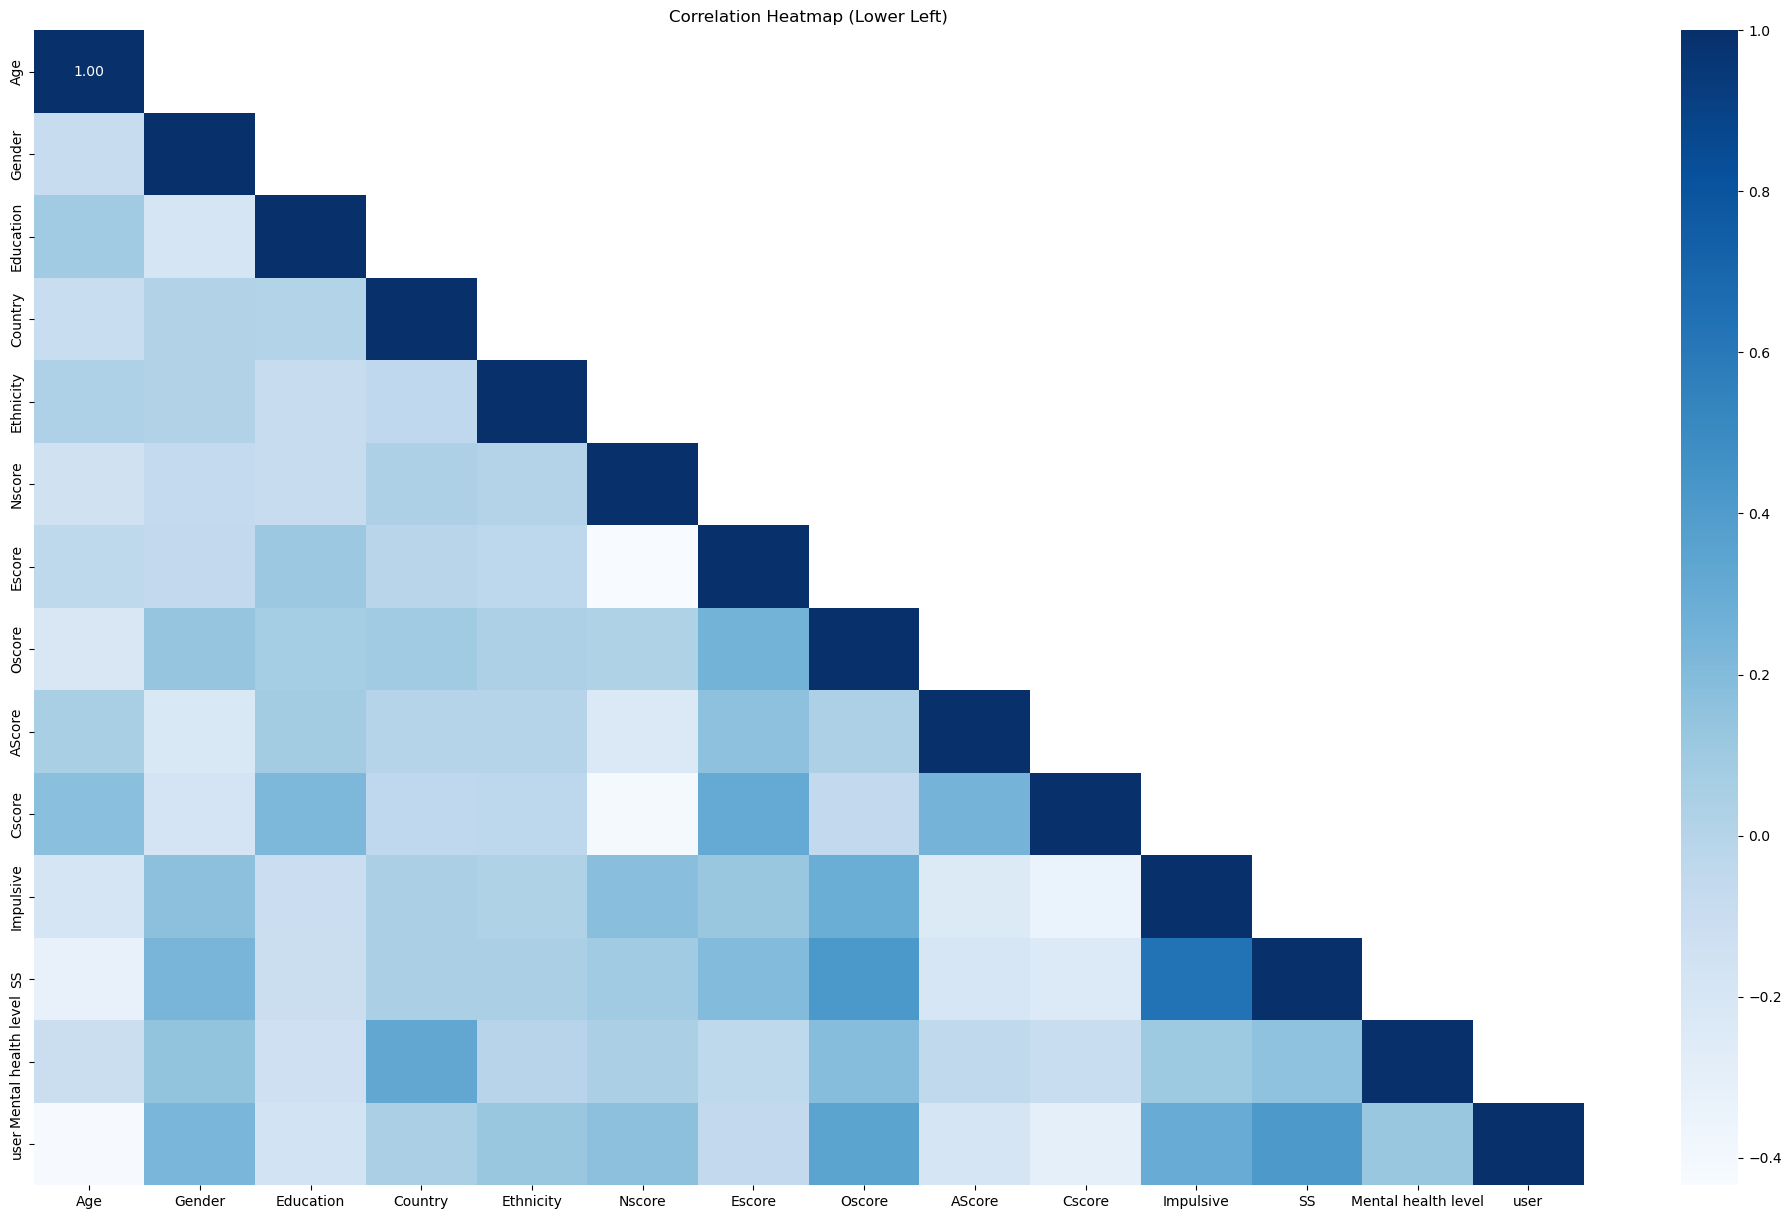

In [63]:
df = df.drop(['opioid_drugs', 'ecstasy_drugs', 'benzo_drugs', 'opioid_use', 'benzo_use', 'ecstasy_use'], axis=1)
correlation = df.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)

plt.figure(figsize=(25, 15))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap (Lower Left)')
plt.show()

In [64]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,user
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,1
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,1
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,1
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,1
1754,0,1,4,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,1
1755,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,1
1756,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,1


### Prepearing data

In [65]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Mental health level,user
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,1
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,1
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,1
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0,0,4,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,4,1
1754,0,1,4,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,4,1
1755,1,0,6,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,3,1
1756,0,0,4,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,4,1


In [66]:
X = df.drop(['user'], axis=1)
y = df['user']


In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
def results_as_table(classifier, X, y):
    y_pred = classifier.predict(X)
    result = classification_report(y, y_pred, output_dict=True)
    my_df = pd.DataFrame(result).transpose()
    return my_df

### Logistic regression

In [70]:
parameters = {
    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10., 100.],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [5000, 10000]
}

grid_logistic_regression = GridSearchCV(LogisticRegression(), parameters, cv=10, n_jobs=-1)
grid_logistic_regression.fit(X_train, y_train)

logistic_regression = grid_logistic_regression.best_estimator_
logistic_regression_results = results_as_table(logistic_regression, X_test, y_test)


In [71]:
logistic_regression_results

,precision,recall,f1-score,support
0,0.719512,0.584158,0.644809,101.000000
1,0.844444,0.908367,0.875240,251.000000
accuracy,0.815341,0.815341,0.815341,0.815341
macro avg,0.781978,0.746262,0.760024,352.000000
weighted avg,0.808597,0.815341,0.809122,352.000000


In [72]:
grid_logistic_regression.best_params_


{'C': 0.05, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'liblinear'}

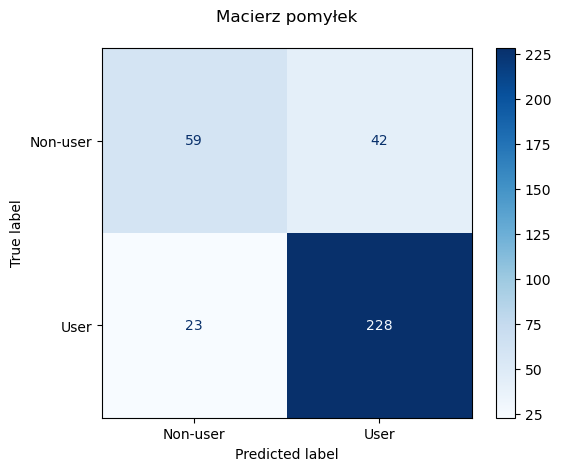

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
    logistic_regression,
    X_test,
    y_test,
    display_labels=['Non-user', 'User'],
    cmap='Blues'
)

disp.ax_.set_title('Macierz pomyłek', y=1.05)

plt.show()

SVM

In [74]:

parameters = {
    'C': [0.001, 0.01, 0.1, 1.0, 5.0, 10., 100.],
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
    'gamma': ['auto', 'scale']
}

grid_svm = GridSearchCV(svm.SVC(), parameters, cv=10, n_jobs=-1)
grid_svm.fit(X_train, y_train)

SVM = grid_svm.best_estimator_

In [75]:
results_as_table(SVM, X_test, y_test)

,precision,recall,f1-score,support
0,0.722222,0.643564,0.680628,101.000000
1,0.862595,0.900398,0.881092,251.000000
accuracy,0.826705,0.826705,0.826705,0.826705
macro avg,0.792409,0.771981,0.780860,352.000000
weighted avg,0.822318,0.826705,0.823572,352.000000


In [76]:
grid_svm.best_params_

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}

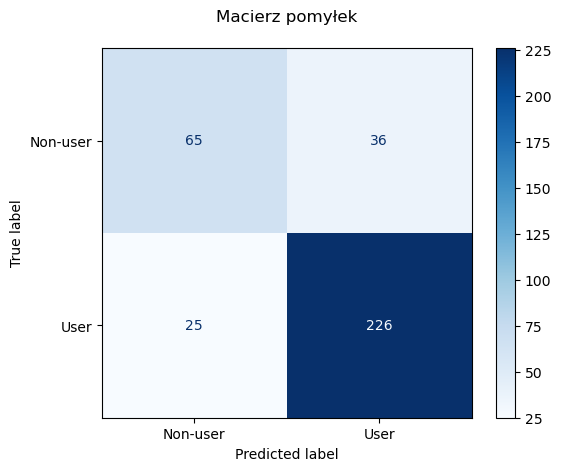

In [77]:
disp2 = ConfusionMatrixDisplay.from_estimator(
    SVM,
    X_test,
    y_test,
    display_labels=['Non-user', 'User'],
    cmap='Blues'
)

disp2.ax_.set_title('Macierz pomyłek', y=1.05)

plt.show()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
              precision    recall  f1-score   support

           0       0.68      0.61      0.65       101
           1       0.85      0.88      0.87       251

    accuracy                           0.81       352
   macro avg       0.77      0.75      0.76       352
weighted avg       0.80      0.81      0.80       352



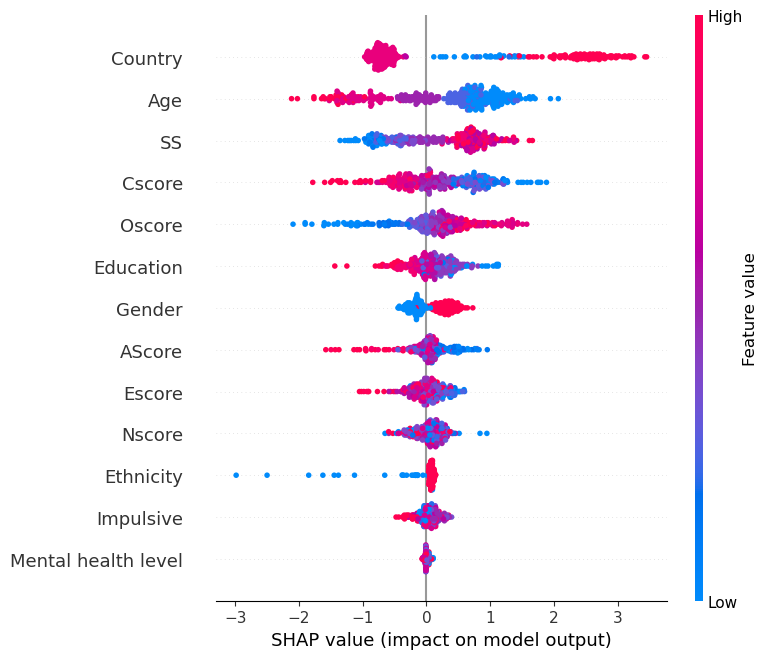

In [78]:
%pip install xgboost
import xgboost as xgb

# Install shap if not already installed
%pip install shap
import shap

# Model XGBoost
xgb_model = xgb.XGBClassifier(learning_rate=0.05, n_estimators=300, max_depth=5)
xgb_model.fit(X_train, y_train)

# Ewaluacja
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Interpretacja SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

Note: you may need to restart the kernel to use updated packages.


2025-04-24 16:55:43.859396: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/msid/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6357 - loss: 0.6227 - val_accuracy: 0.7801 - val_loss: 0.4635
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7796 - loss: 0.4898 - val_accuracy: 0.8191 - val_loss: 0.4103
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7694 - loss: 0.4579 - val_accuracy: 0.8191 - val_loss: 0.3924
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8102 - loss: 0.4018 - val_accuracy: 0.8227 - val_loss: 0.3833
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7930 - loss: 0.4245 - val_accuracy: 0.8262 - val_loss: 0.3814
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8242 - loss: 0.3834 - val_accuracy: 0.8227 - val_loss: 0.3768
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8068 - loss: 0.4126 - val_accuracy: 0.8262 - val_loss: 0.3722
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8203 - loss: 0.3953 - val_accuracy: 0.8298 

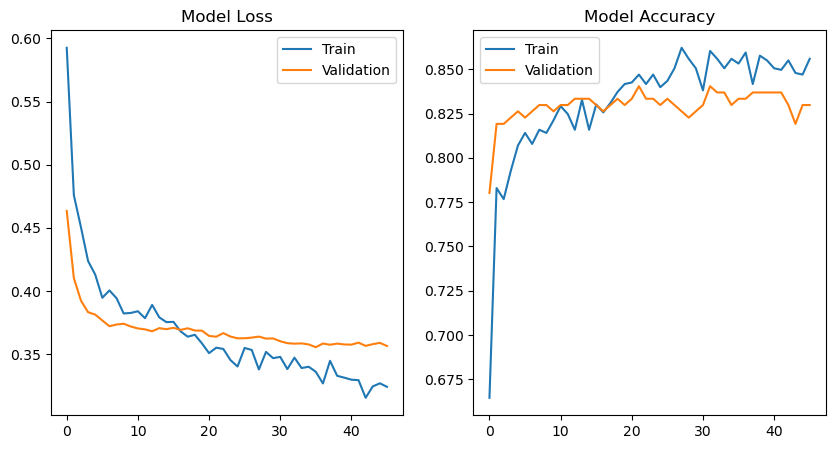

In [79]:
%pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model sieci neuronowej
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Trenowanie
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Wizualizacja procesu uczenia
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [81]:
# W Jupyter Notebook
import joblib

# Zapisz model
joblib.dump(xgb_model, 'drug_use_model.pkl')
# Zapisz skaler
joblib.dump(scaler, 'drug_use_scaler.pkl')
# Zapisz nazwy kolumn
import json
with open('feature_names.json', 'w') as f:
    json.dump(list(X.columns), f)

In [82]:
# Eksport danych dotyczących wieku
age_data = df.groupby('Age')['user'].value_counts().unstack().fillna(0)
age_data.columns = ['Non-users', 'Users']  # Zmień nazwy kolumn
age_data.to_csv('data/age_distribution.csv')

# Eksport danych dotyczących płci
gender_data = df.groupby('Gender')['user'].value_counts().unstack().fillna(0)
gender_data.columns = ['Non-users', 'Users']
gender_data.to_csv('data/gender_distribution.csv')

# Podobnie dla innych kategorii (edukacja, zdrowie psychiczne)
education_data = df.groupby('Education')['user'].value_counts().unstack().fillna(0)
education_data.columns = ['Non-users', 'Users']
education_data.to_csv('data/education_distribution.csv')

mental_health_data = df.groupby('Mental health level')['user'].value_counts().unstack().fillna(0)
mental_health_data.columns = ['Non-users', 'Users']
mental_health_data.to_csv('data/mental_health_distribution.csv')

# Eksport korelacji
correlations = df.corr()['user'].sort_values(ascending=False)
correlations = correlations.drop('user')  # Usuń autokorelację
correlations.to_csv('data/feature_correlations.csv')